# OpenTable Forecasting

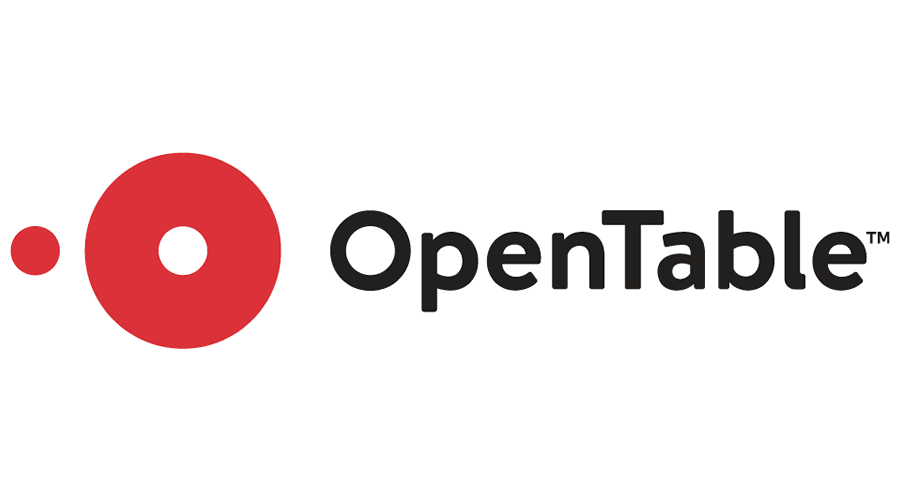

# Overview

When Covid-19 hit the United States in March of 2020, everyone was quarantined in their homes, and the economy ground to a halt. One of the industries hit hardest by Covid was the food and restaurant industry. Restaurants operate on very small margins to begin with, so completely shutting down for many months was crushing, causing many to permanently close.

# Business Problem

Opening a new restaurant takes a lot of time and capital, and maintaining a restaurant is extremely difficult due to the long work hours and tight margins. Compounded with Covid, the restaurant industry has been crushed in the last two years. The entire country shut down in March of 2020, and even once cities started reopening, there were restrictions, such as only essential businesses, mask (and later vaccine) mandates, and the most significant restriction for restaurants was that they could not operate at full capacity.  

This analysis will use time series to determine how different city's politics, as it relates to Covid restrictions, have impacted how each city's restaurant industry was affected during and post Covid.  

My stakeholder is the National Restaurant Association. They aim to represent and advocate for the more than 500,000 restaurant businesses they serve by providing various resources such as Financial, Tax & Audit, Food Safety & Quality Assurance, HR, and Sustainability. The National Restaurant Association can use this analysis to determine what resources are necessary and which cities most need them.   

My analysis will look at six cities, 3 Republican and 3 Democratic: New York City, New York (D), Los Angeles, California (D), New Orleans, Louisiana (D), Dallas, Texas (R), Miami, Florida (R) and Phoenix, Arizona (R). According to various sources, all six cities are also known to be "foodie cities," such as this article from June 2022: https://www.2foodtrippers.com/best-food-cities-in-the-us/.


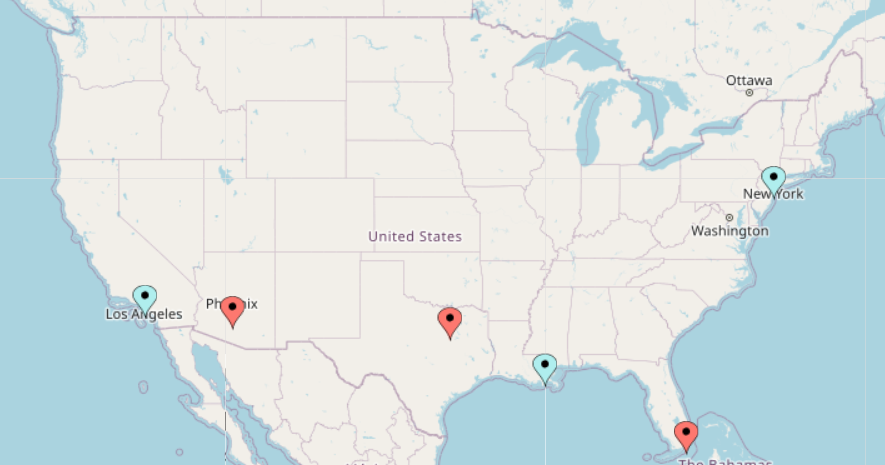

I have plotted the six cities I will analyze on a United States map. The red pins are Republican cities, and the blue pins are Democratic cities.

# Data Understanding

In March 2020, Opentable launched a "State of the Industry" project to illustrate how Covid has impacted restaurants. The data has been updated daily since early 2022, and my analysis includes data from 2/18/20 (when the project launched) through 7/7/22.

The data analyzed is a daily percent change, year-over-year comparison, with 2019 as the baseline. However, given that the day of the week is relevant for restaurant reservations, the same day of the same week is compared, not the same date. For example, Tuesday of week 11 in 2021 is compared to Tuesday of week 11 in 2019. If a restaurant had 100 reservations in 2019 and 40 on the same day of the same week in 2021, a -60% is listed.

Each city included has at least 50+ restaurants on the OpenTable network; however, the data does not account for the changes in the number of restaurants on OpenTable per city. Many restaurants permanently closed during Covid, which could affect the number of reservations in and of itself because there are fewer options. However, with over 50+ restaurants on the network, it is unlikely this will have a significant impact. The data also includes restaurants that have not gone out of business but have still not reopened to customers, meaning that this restaurant will have -100% listed, which would impact the total % change for the city.    

# Data Limitations

This dataset had several limitations.  
-First and most importantly, I only have about 2.5 years of data (February 2020-July, 2022), which is not very much data to form an accurate model to predict future restaurant reservations.  
-Second, the restaurants used in the dataset are not necessarily the same for each year. Many restaurants went out of business during Covid, and sometimes new ones went up in their place, which could affect the number of reservations overall.  
-Next, the data did not include the type of cuisine, so certain types of restaurants could have done better or worse overall or on certain days of the week, based on promotions or special events.  
-Lastly, OpenTable stated that each city analyzed had at least 50+ restaurants in its network; however, the number of restaurants could have, and probably did, change dramatically from the baseline of 2019 to July 2022. This does not necessarily impact the number of reservations overall because since there are 50+ restaurants in the city, customers could have chosen one of the other available restaurants; however, it is another limitation to consider. 

# Covid Background/Restrictions

As stated above, the six cities I used in this analysis were: New York City, New York (D), Los Angeles, California (D), New Orleans, Louisiana (D), Dallas, Texas (R), Miami, Florida (R), Phoenix, Arizona (R).

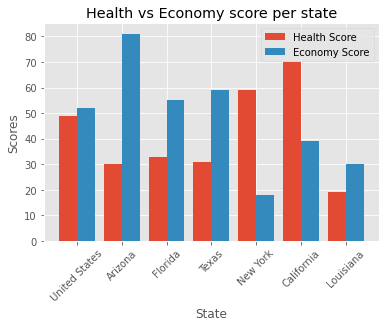

*The code for this graph is in the appendix

This graph shows the health and economy scores for each of these states, as reported by Politico. The health score includes of # of deaths, hospital admissions, vaccinations, and Covid testing. The economy score consists of state GDP (quarter-over-quarter change compared to 2019) and unemployment (an average month-over-month change compared to 2019). 

The average scores across the entire United States are also plotted as a comparison. As shown in the graph, the three Republican states, Arizona, Florida, and Texas, have higher economy scores and lower health scores. Not surprisingly, these were also states that had fewer Covid restrictions and shorter shutdowns. The two Democratic states, New York and California, had more Covid restrictions and, therefore, higher health scores but lower economic scores. The last state plotted was Louisiana, which is generally a Republican state; however, New Orleans is a much more liberal city than the rest of the state and therefore had many more Covid restrictions than the rest of Louisiana. These scorecards were only available on a state-wide basis, so New Orleans' response to Covid does not entirely line up with the state of Louisiana. https://www.nola.com/news/coronavirus/article_fd14b8b2-934d-11eb-a45f-67ac65525d56.html

According to Politico, "What the scorecard shows is that the pandemic has played out in vastly different ways across America and that those state decisions had real-life impacts. There was no optimal set of choices, no perfect path a governor or other state officials could have taken. Every choice came with negative consequences, some known ahead of time, some only discovered or appreciated months later...The answers weren’t obvious. State officials had limited information about the virus, and the trade-offs were difficult. Protect residents’ health and instruct them to stay home – but risk driving companies out of business and accelerating unemployment. Keep businesses open – but risk a rise in hospitalizations and deaths. Close schools to control spread – but risk damaging kids’ education."

What has become clear, however, is that cities with more restrictions (stay-at-home orders, limited dining capacity, mask requirements, etc.) did experience lower rates of death and hospitalizations due to Covid, however, they also tended to have worse economic outcomes.

Politico also states, "During the pandemic, Republican-led states tended to be more resistant to mask mandates and stay-at-home edicts while Democratic governors, by and large, embraced those public health precautions, even at the expense of the local economy." This is shown in my data, as restaurants in Republican cities had far more reservations than restaurants in Democratic cities. 

For more information on how different cities and states responded to Covid and how that impacted their health, economy, education, and social well-being, visit https://www.politico.com/interactives/2021/covid-by-the-numbers-how-each-state-fared-on-our-pandemic-scorecard/.

## Data Setup

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit

import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pmdarima as pm
import itertools
from io import StringIO
pd.set_option('display.max_rows', 1000)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#import data
df_full = pd.read_csv('Data/Opentable_dataset.csv')
df_full.head(10)

Type            Name 2020/2/18 2020/2/19 2020/2/20 2020/2/21 2020/2/22  \
0  country          Global       -1%        3%       -1%       -2%        1%   
1  country       Australia       -3%       -6%       -3%       -1%        0%   
2  country          Canada       -5%        0%       -3%       -2%       -1%   
3  country         Germany       11%        4%        3%        5%        1%   
4  country         Ireland        2%        0%        4%        1%       -3%   
5  country          Mexico       -5%       -5%       -4%       -3%       -1%   
6  country  United Kingdom        1%       -1%       -2%        0%       -1%   
7  country   United States        0%        4%        0%       -1%        2%   
8    state         Alabama      -14%        7%        1%       -2%        8%   
9    state         Alberta        2%       10%        2%        1%        5%   

  2020/2/23 2020/2/24 2020/2/25 2020/2/26 2020/2/27 2020/2/28 2020/2/29  \
0        4%        1%        1%       -2%       -3%       -1%        1%   
1        0%        0%       -2%       -2%       -7%        0%       -1%   
2        8%       -2%       -3%        1%      -12%       -8%       -4%   
3        2%       11%        4%        5%        5%       11%        7%   
4        4%       -9%       -8%      -10%       -2%      -10%      -13%   
5        2%       -1%       -3%       -9%       -7%      -10%       -5%   
6       -4%       -6%       -5%       -5%       -8%       -2%       -3%   
7        6%        2%        2%       -1%       -1%        1%        3%   
8        2%        1%        0%       -8%       -3%       -3%      -11%   
9        0%       -1%        3%       -1%       -4%        3%        2%   

  2020/3/1 2020/3/2 2020/3/3 2020/3/4 2020/3/5 2020/3/6 2020/3/7 2020/3/8  \
0       0%      -8%      -9%      -6%      -7%      -7%      -4%      -3%   
1       4%     -12%      -6%     -12%      -8%      -6%      -3%      -4%   
2      -7%     -12%      -7%      -2%      -4%      -8%      -9%      -1%   
3       9%      -8%       0%      -4%      -6%      -7%       4%      11%   
4      10%      -6%      -7%      -1%     -15%     -13%      -5%       4%   
5      -7%      -7%     -10%      -6%      -6%      -8%      -2%      -5%   
6      -2%      -7%     -11%      -9%     -12%      -5%      -3%       1%   
7       2%      -7%      -9%      -5%      -5%      -6%      -3%      -2%   
8       2%     -32%     -29%     -23%     -15%      -3%      11%     -10%   
9      -4%     -10%      -4%      -1%      -8%       1%     -16%      -7%   

  2020/3/9 2020/3/10 2020/3/11 2020/3/12 2020/3/13 2020/3/14 2020/3/15  \
0     -14%      -18%      -19%      -28%      -36%      -40%      -47%   
1     -10%       -4%      -10%      -12%       -8%      -11%      -12%   
2     -13%      -18%      -19%      -28%      -40%      -41%      -47%   
3     -10%      -16%      -11%      -17%      -28%      -38%      -46%   
4     -10%      -28%      -27%      -46%      -51%      -52%      -75%   
5     -19%      -16%      -15%      -16%      -16%      -21%      -35%   
6     -18%      -17%      -14%      -24%      -26%      -20%      -31%   
7     -14%      -18%      -19%      -28%      -36%      -42%      -48%   
8     -11%      -26%       -8%       -2%      -24%      -28%      -38%   
9     -13%      -10%       -8%      -23%      -43%      -44%      -49%   

  2020/3/16 2020/3/17 2020/3/18 2020/3/19 2020/3/20 2020/3/21 2020/3/22  \
0      -56%      -83%      -89%   -96.03%   -97.94%   -98.96%   -99.24%   
1      -30%      -43%      -50%      -53%   -51.67%   -53.61%   -65.53%   
2      -60%      -94%      -97%   -99.47%   -99.72%   -99.89%   -99.94%   
3      -63%      -90%      -95%   -98.36%   -98.79%   -99.78%   -99.96%   
4      -70%      -86%      -97%   -98.55%   -99.08%   -98.76%   -98.31%   
5      -48%      -62%      -73%   -78.41%   -85.12%   -90.81%    -95.2%   
6      -52%      -82%      -88%   -91.08%   -93.93%   -99.96%   -99.99%   
7      -56%      -84%      -91%   -9

In [3]:
#create new dataset with just the 6 cities I am analyzing

list=['New York', 'Los Angeles', 'Dallas', 'New Orleans', 'Miami', 'Phoenix']

df = df_full[df_full.Name.isin(list)]
df

Type         Name 2020/2/18 2020/2/19 2020/2/20 2020/2/21 2020/2/22  \
45   state     New York       -1%       11%        1%       -4%        1%   
84    city       Dallas        6%       -4%        1%        3%       -3%   
97    city  Los Angeles        7%        6%        9%        1%        8%   
100   city        Miami        0%       -8%       -5%        1%        5%   
108   city  New Orleans       -9%        1%       14%       23%       10%   
109   city     New York        1%       11%        3%        0%        3%   
112   city      Phoenix       -4%        0%       11%       -1%        0%   

    2020/2/23 2020/2/24 2020/2/25 2020/2/26 2020/2/27 2020/2/28 2020/2/29  \
45        13%        6%        1%       -1%       -5%       -2%       -1%   
84        -2%       -2%       14%        1%       -7%        6%       10%   
97        29%       12%       15%        5%        0%        8%       13%   
100       -7%       17%        1%       -9%        0%        0%        4%   
108       21%      109%      102%        9%      -21%      -21%      -16%   
109       13%        7%        1%        1%       -2%        1%       -2%   
112        1%        7%        3%       -2%       -2%        7%       -5%   

    2020/3/1 2020/3/2 2020/3/3 2020/3/4 2020/3/5 2020/3/6 2020/3/7 2020/3/8  \
45        0%      -7%     -11%      -9%      -8%     -14%     -10%      -2%   
84       11%       1%      -6%      -8%       0%       3%      -1%      -2%   
97       -3%      -1%       4%       7%      -5%       1%      -2%     -15%   
100     -18%     -13%     -15%      -6%      -2%     -11%      -2%      10%   
108     -27%     -47%     -59%     -32%       5%       6%       3%      -3%   
109      -2%      -6%     -12%     -12%      -9%     -15%     -10%      -4%   
112     -11%     -13%     -21%      -8%      -8%      -7%      -6%      -8%   

    2020/3/9 2020/3/10 2020/3/11 2020/3/12 2020/3/13 2020/3/14 2020/3/15  \
45      -15%      -27%      -32%      -49%      -54%      -36%      -47%   
84      -15%      -10%      -12%      -25%      -35%      -35%      -42%   
97      -27%      -23%      -26%      -38%      -48%      -47%      -57%   
100      -9%      -15%      -18%      -22%      -27%      -30%      -36%   
108     -13%      -13%      -21%      -28%      -32%      -39%      -54%   
109     -18%      -30%      -36%      -52%      -61%      -64%      -69%   
112     -18%      -13%      -28%      -21%      -28%      -27%      -45%   

    2020/3/16 2020/3/17 2020/3/18 2020/3/19 2020/3/20 2020/3/21 2020/3/22  \
45       -58%      -88%     -100%   -99.98%   -99.96%     -100%     -100%   
84       -61%     -100%     -100%   -99.93%   -99.93%     -100%     -100%   
97       -82%     -100%     -100%     -100%     -100%     -100%     -100%   
100      -46%      -78%     -100%     -100%     -100%     -100%     -100%   
108      -63%     -100%     -100%   -99.96%     -100%     -100%     -100%   
109      -77%     -100%     -100%     -100%     -100%     -100%     -100%   
112      -66%      -86%      -99%   -99.65%   -99.85%     -100%     -100%   

    2020/3/23 2020/3/24 2020/3/25 2020/3/26 2020/3/27 2020/3/28 2020/3/29  \
45      -100%     -100%     -100%     -100%     -100%     -100%     -100%   
84      -100%     -100%     -100%     -100%     -100%     -100%     -100%   
97      -100%     -100%     -100%     -100%     -100%     -100%     -100%   
100     -100%     -100%     -100%     -100%     -100%     -100%     -100%   
108     -100%     -100%     -100%     -100%     -100%     -100%     -100%   
109     -100%     -100%     -100%     -100%     -100%     -100%     -100%   
112     -100%     -100%     -100%     -100%     -100%     -100%     -100%   

    2020/3/30 2020/3/31 2020/4/1 2020/4/2 2020/4/3 2020/4/4 2020/4/5 2020/4/6  \
45      -100%     -100%    -100%    -100%    -100%    -100%    -100%    -100%   
84      -100%     -100%    -100%    -100%    -100%    -100%    -100%    -100%   
97      -100%     -100%    -100%    -100%    -100%   

In [4]:
#since I am only comparing cities, I am dropping index "45" which is NY state
df.drop([45], inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
#In order to get my "date" to the index
#I will set the "name" column to the index and then transpose the data

df.set_index('Name', inplace = True)
df = df.transpose()
df.head(10)

Name      Dallas Los Angeles Miami New Orleans New York Phoenix
Type        city        city  city        city     city    city
2020/2/18     6%          7%    0%         -9%       1%     -4%
2020/2/19    -4%          6%   -8%          1%      11%      0%
2020/2/20     1%          9%   -5%         14%       3%     11%
2020/2/21     3%          1%    1%         23%       0%     -1%
2020/2/22    -3%          8%    5%         10%       3%      0%
2020/2/23    -2%         29%   -7%         21%      13%      1%
2020/2/24    -2%         12%   17%        109%       7%      7%
2020/2/25    14%         15%    1%        102%       1%      3%
2020/2/26     1%          5%   -9%          9%       1%     -2%

In [6]:
#drop row labeled "type" as it is no longer necessary
df = df.drop(["Type"])

In [7]:
#set date to index
df = df.set_index(pd.to_datetime(df.index))

In [8]:
#confirm index is now the date
print(f"Now our index is a {type(df.index)}")

Now our index is a <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [9]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 870 entries, 2020-02-18 to 2022-07-06
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Dallas       870 non-null    object
 1   Los Angeles  870 non-null    object
 2   Miami        870 non-null    object
 3   New Orleans  870 non-null    object
 4   New York     870 non-null    object
 5   Phoenix      870 non-null    object
dtypes: object(6)
memory usage: 47.6+ KB


In [10]:
#convert data from a percentage to a decimal
df[df.columns] = df[df.columns].replace('[%]', '', regex=True).astype(float)/100
df.head()

Name        Dallas  Los Angeles  Miami  New Orleans  New York  Phoenix
2020-02-18    0.06         0.07   0.00        -0.09      0.01    -0.04
2020-02-19   -0.04         0.06  -0.08         0.01      0.11     0.00
2020-02-20    0.01         0.09  -0.05         0.14      0.03     0.11
2020-02-21    0.03         0.01   0.01         0.23      0.00    -0.01
2020-02-22   -0.03         0.08   0.05         0.10      0.03     0.00

## Resampling

My original data has daily values, sampled year-over-year with 2019 as the baseline, using the same day of the week of the same month to compare. Because the data was sampled using the same day of the week for each year, I chose to resample my data to compare the reservation changes by the week. I felt this would be a more appropriate way to forecast the data because I am looking at the progression of restaurants reservations overtime and daily values is very granular.   
I will use the median to resample the data, because the mean wouldn't take into account outliers, such as holidays in certain cities like Mardi Gras in New Orleans.

In [11]:
df_new = df.resample('W').median()

In [12]:
#reorder columns to group the Republican cities and Democratic cities in order
df_new = df_new[['New York', 'Los Angeles', 'New Orleans', 'Dallas', 'Miami', 'Phoenix']]
df_new.head()

Name        New York  Los Angeles  New Orleans  Dallas  Miami  Phoenix
2020-02-23      0.03         0.08         0.12   -0.01  -0.03     0.00
2020-03-01      0.01         0.08        -0.16    0.06   0.00    -0.02
2020-03-08     -0.10        -0.01        -0.03   -0.01  -0.06    -0.08
2020-03-15     -0.52        -0.38        -0.28   -0.25  -0.22    -0.27
2020-03-22     -1.00        -1.00        -1.00   -1.00  -1.00    -1.00

My dataset is now set up and ready to explore.

## EDA

I first wanted to see the average change in reservations per city from the baseline of 2019. Because some values are positive and some are negative, these averages represent the difference from 2019, taking into account the weeks that have positive values.

In [13]:
df_mean = df_new.mean().sort_values(ascending = False)
df_mean

Name
Miami         -0.07
Phoenix       -0.27
Dallas        -0.28
New Orleans   -0.46
Los Angeles   -0.51
New York      -0.65
dtype: float64

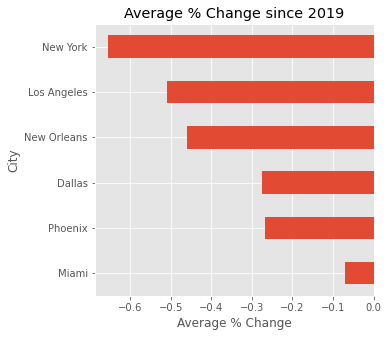

In [14]:
df_mean.plot.barh(y='column', figsize=(5, 5), title= "Average % Change since 2019")
plt.xlabel("Average % Change")
plt.ylabel("City")
plt.savefig('Images/Average_&_Change',bbox_inches='tight');

This graph shows the negative average change in reservations since 2019, with NYC having the most significant decrease, 65% on average since 2019. As shown in this graph, the three more Democratic cities, New York, LA, and New Orleans, have been hit significantly harder, with many fewer reservations than the three conservative cities, Dallas, Phoenix, and Miami.

### Total Distribution of the Number of Reservations per City

I next wanted to see the total number of reservations for each percent change since 2019. All 6 cities will be plotted on the same scale, with -1 to 0.6 on the X-Axis (the highest and lowest percent change) and 0-35 on the Y-Axis (the highest and lowest total # of weeks for each percent change).

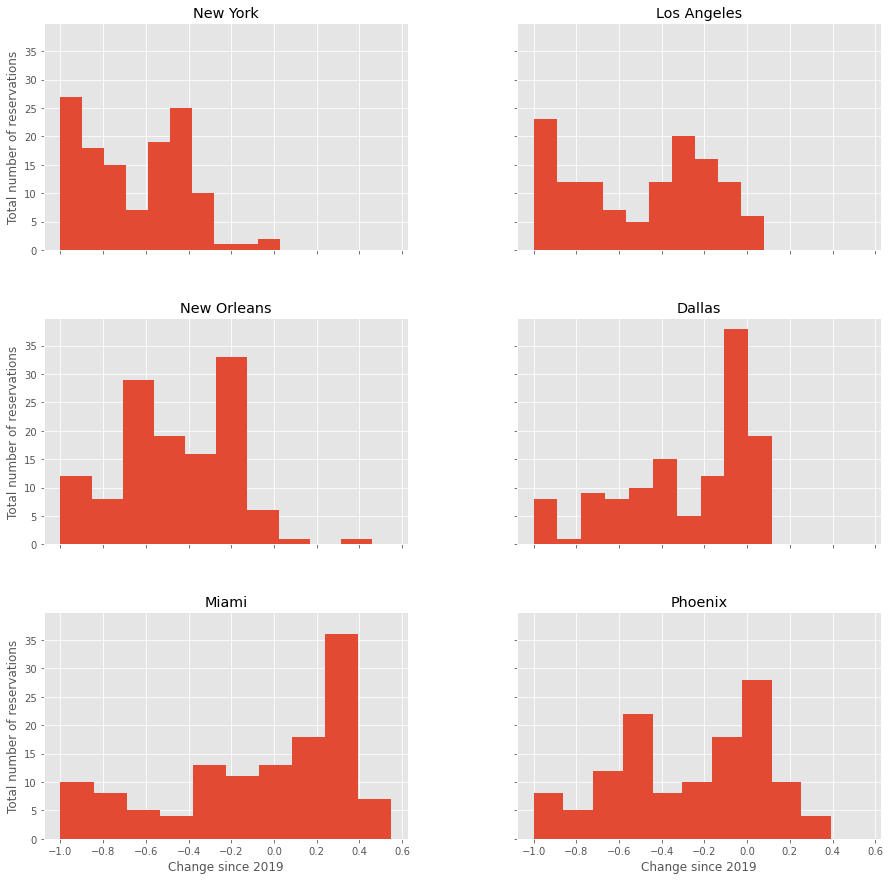

In [15]:
hist = df_new.hist(figsize=(15, 15), sharey = True, sharex = True)
                
for ax in hist.flatten():
    ax.set_xlabel("Change since 2019")
    ax.set_ylabel("Total number of reservations"), 
    ylabelsize =15
    xlabelsize =15
    
plt.savefig('Images/Number_of_Reservations',bbox_inches='tight');

Cities with histograms with values above 0 have (at any point since 2019) had more reservations week-over-week than in 2019. Phoenix (R) and Miami (R) have the highest values, with up to 55% more reservations at some points since 2019. New York City (D) does not have any data points above 0, and New Orleans (D), LA (D), and Dallas (R) have very few points above 0.

### Reservations per city 

I will now plot the reservations for each city over time. The Y-axis will again be consistent for all 6 graphs, with -1 to 0.6. The X-axis represents the dates.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

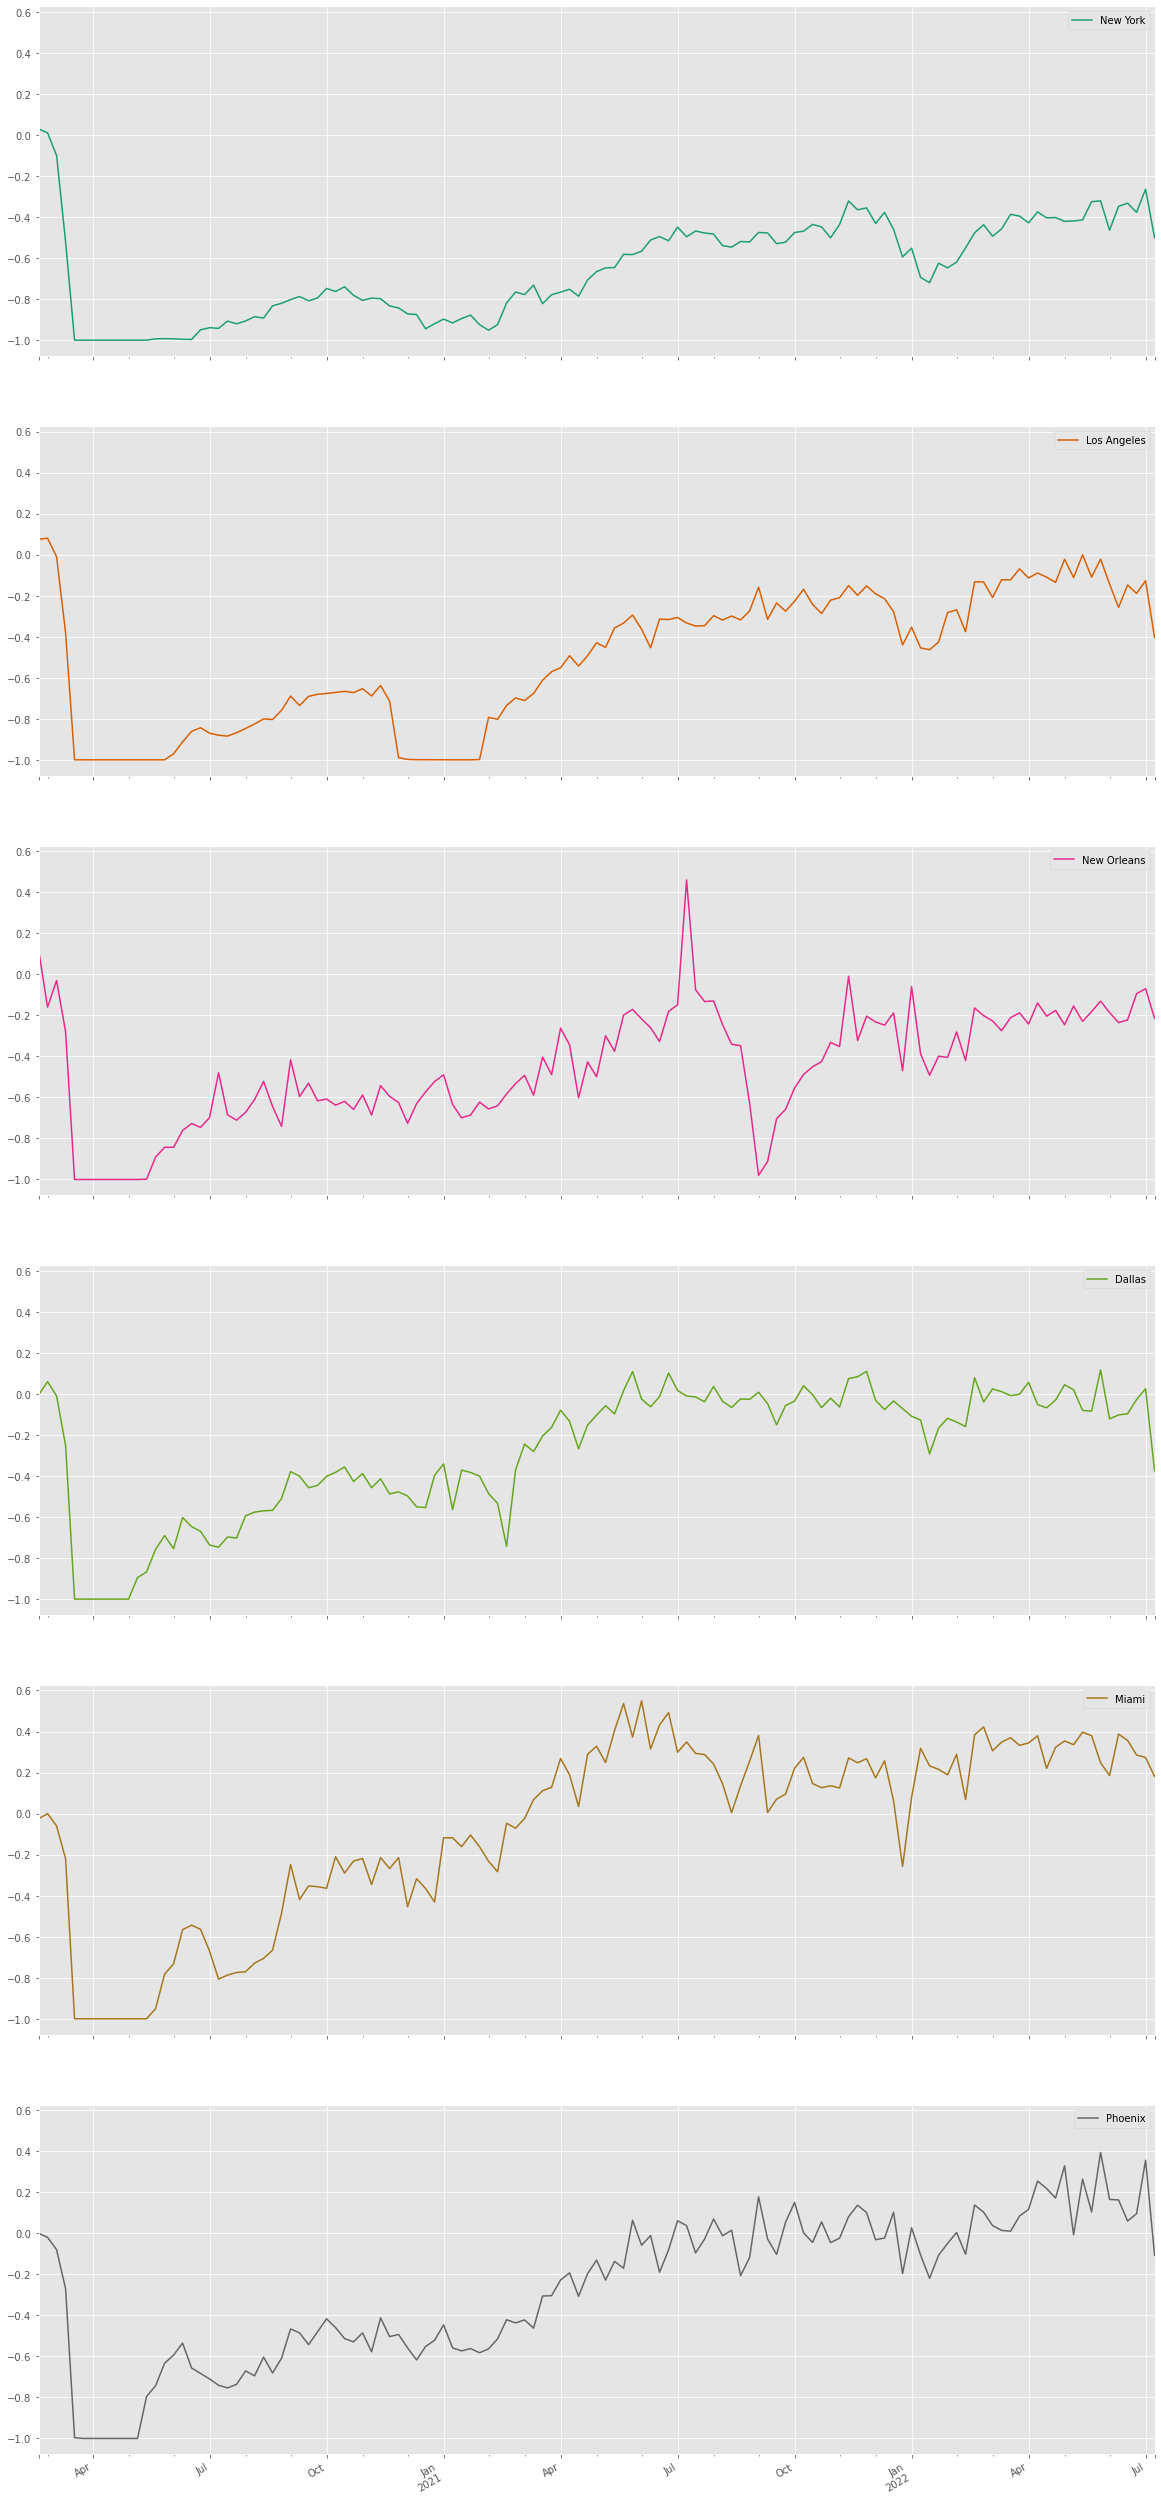

In [16]:
df_new.plot(figsize=(20, 50), colormap = 'Dark2', subplots=True, sharex=True, sharey=True)

I am now going to plot all 6 line graphs on one plot to compare.

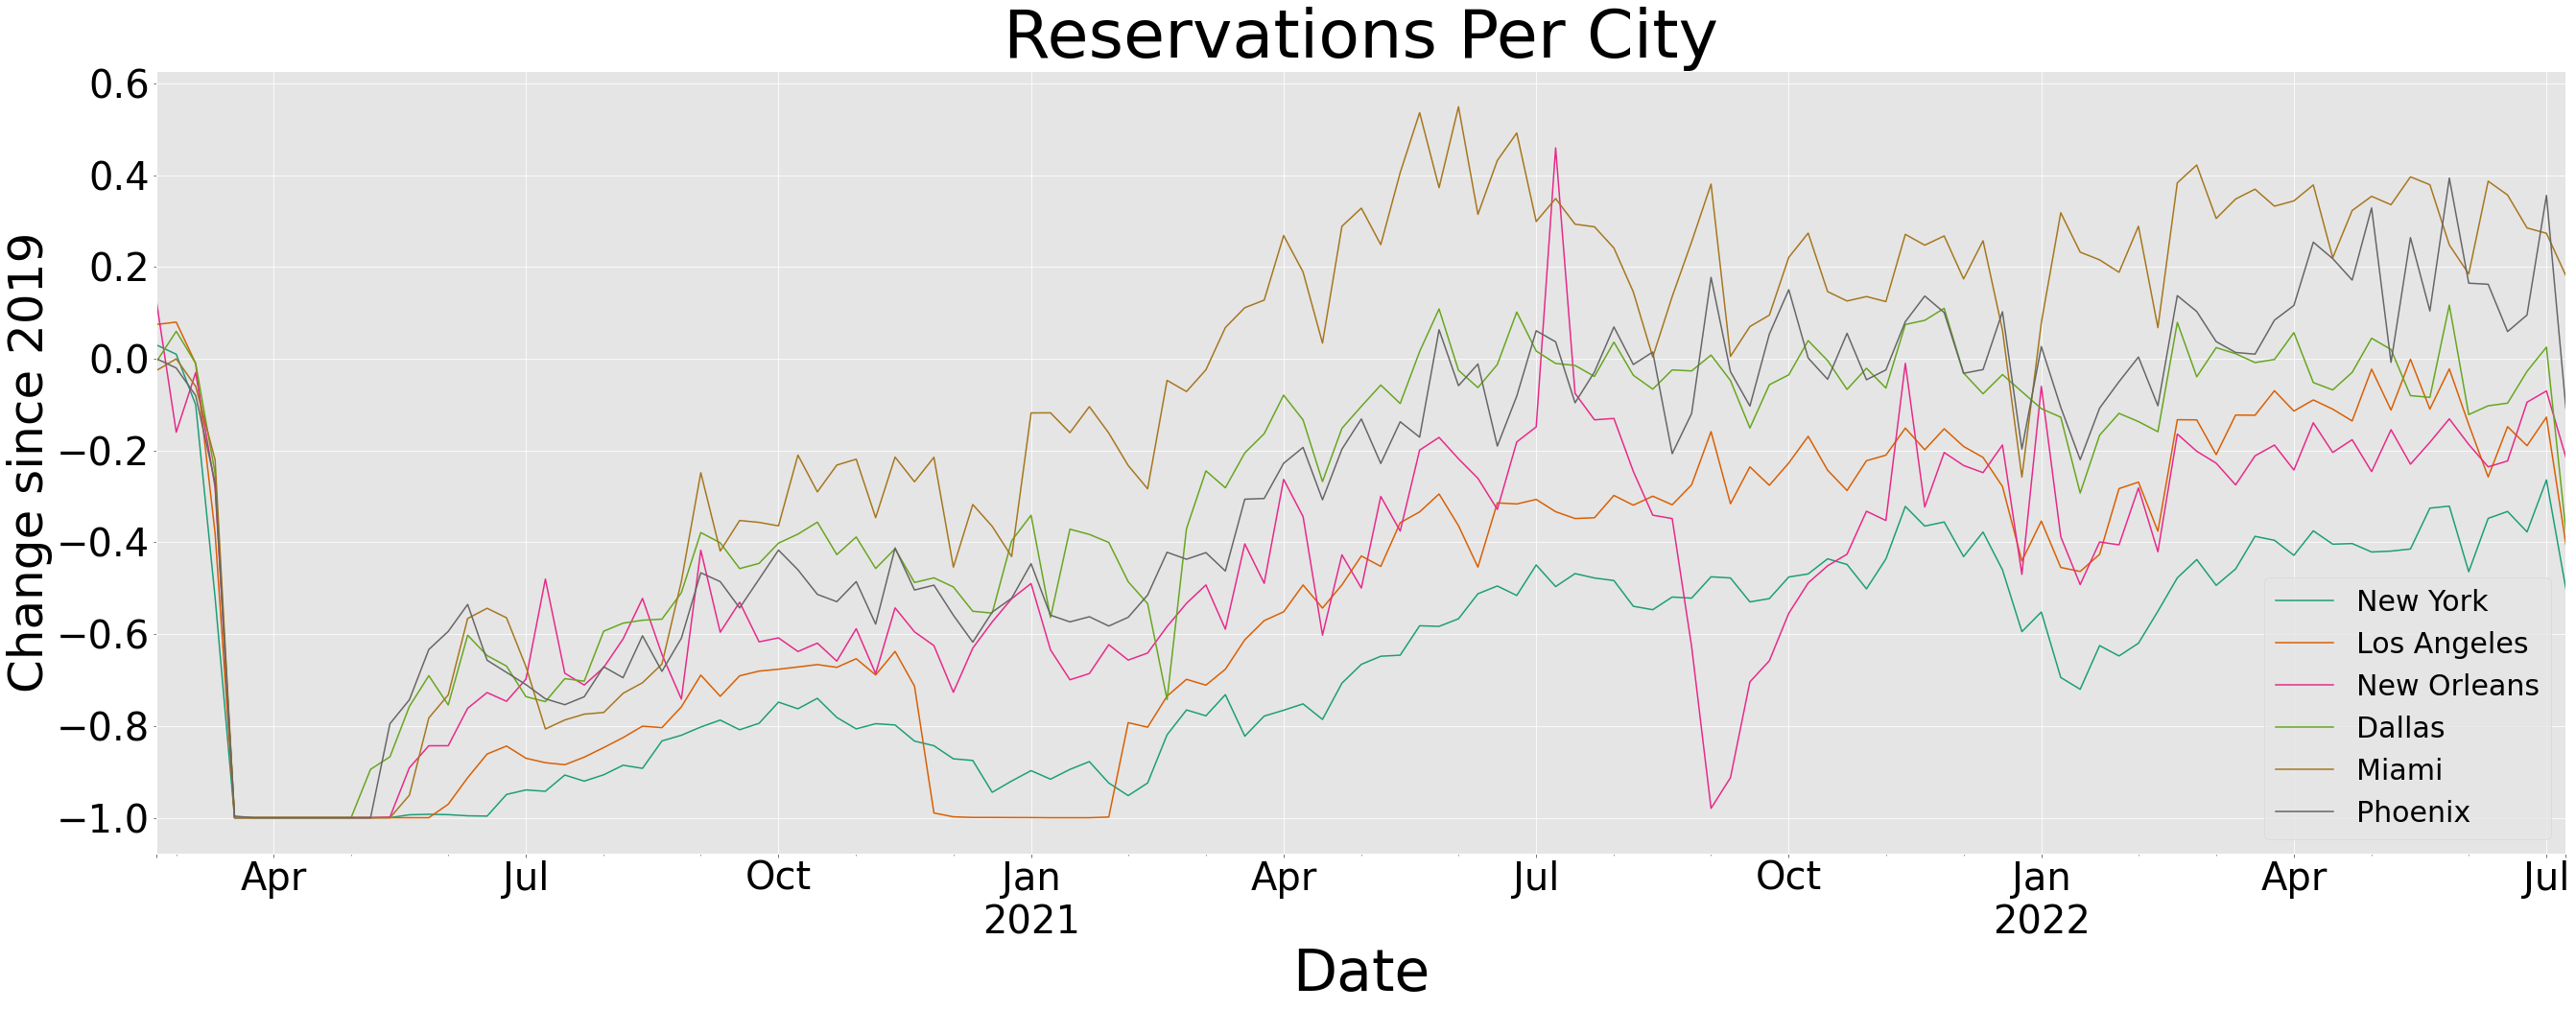

In [17]:
df_new.plot(figsize=(45, 15), colormap = 'Dark2', grid = True)
plt.xlabel("Date", fontsize=60, color = 'black')
plt.ylabel("Change since 2019",fontsize=50, color = 'black')
plt.title('Reservations Per City', fontsize = 70)
plt.xticks(fontsize = 40, color = 'black')
plt.yticks(fontsize = 40, color = 'black')
plt.legend(fontsize = 30)
plt.savefig('Images/Reservations_per_city',bbox_inches='tight');

While it is hard to differentiate between cities on this graph, it is helpful to see the general trends and the initial lockdown. This graph also shows when certain cities had steep drops at certain times, so further evaluation and research will need to be done to account for these drops. We do see a generally positive trend. 

## Test for Stationary- Dicky Fuller Test

From the graph above, it is clear that this data is not stationary. Because stationarity is necessary to run an accurate time series forecast, I will run a Dicky-Fuller test on the data to see which, if any, cities have stationary data. I will then make any necessary cities data stationery. 

In [18]:
adf_results = {}
for col in df_new.columns.values:  
    adf_results[col] = tsa.adfuller(df_new[col])

adf_results

{'New York': (-2.3528393722627636,
  0.15549174243422942,
  3,
  121,
  {'1%': -3.485585145896754,
   '5%': -2.885738566292665,
   '10%': -2.5796759080663887},
  -338.4368406567406),
 'Los Angeles': (-1.9341942423997849,
  0.3161499251846801,
  7,
  117,
  {'1%': -3.487517288664615,
   '5%': -2.8865777180380032,
   '10%': -2.5801239192052012},
  -263.2411622209577),
 'New Orleans': (-2.650977996844383,
  0.08291207991430016,
  1,
  123,
  {'1%': -3.4846672514209773,
   '5%': -2.8853397507076006,
   '10%': -2.5794629869786503},
  -125.84216376328015),
 'Dallas': (-1.8827796298196047,
  0.34020497201325317,
  3,
  121,
  {'1%': -3.485585145896754,
   '5%': -2.885738566292665,
   '10%': -2.5796759080663887},
  -211.69802050214093),
 'Miami': (-1.3727807487537735,
  0.5952535896570197,
  2,
  122,
  {'1%': -3.4851223522012855,
   '5%': -2.88553750045158,
   '10%': -2.5795685622144586},
  -154.10655147982357),
 'Phoenix': (-1.7395977827527487,
  0.4108345771337059,
  8,
  116,
  {'1%': -3.4

In [19]:
# loop over dictionary data
non_stationary = []
stationary = []
for key, value in adf_results.items():
    if value[1] > 0.05:
        non_stationary.append(key)
    else:
        stationary.append(key)
print(f'Non-Stationary: {non_stationary}')
print(f'Stationary: {stationary}')

Non-Stationary: ['New York', 'Los Angeles', 'New Orleans', 'Dallas', 'Miami', 'Phoenix']
Stationary: []


As expected, none of the cities have stationary data, so I will now separate the data frame into individual series and make each stationary.

In [20]:
#Separate each city into it's own dataframe
NY = df_new['New York']
LA = df_new['Los Angeles']
NOLA = df_new['New Orleans']
DAL = df_new['Dallas']
MIA = df_new['Miami']
PHO = df_new['Phoenix']

## Make Data Stationary

I will start by taking the difference of the data and then re-test for stationarity. Differencing transforms the data by subtracting each data point from the previous point, resulting in a dataset of differences between points in time. This helps to stabilize the mean and remove changes in the level of a time series, which eliminates trend and seasonality.

### New York

In [21]:
NY_new = NY.diff().dropna()
NY_new.head()

2020-03-01   -0.02
2020-03-08   -0.11
2020-03-15   -0.42
2020-03-22   -0.48
2020-03-29    0.00
Freq: W-SUN, Name: New York, dtype: float64

In [22]:
dftest = adfuller(NY_new)
display(dftest)

(-6.105322991927242,
 9.615789374613311e-08,
 2,
 121,
 {'1%': -3.485585145896754,
  '5%': -2.885738566292665,
  '10%': -2.5796759080663887},
 -333.4048222565293)

With a p-value of 9.61 e-08, differencing did make this data stationary. I will now plot the differenced data against the original data to see how they compare.

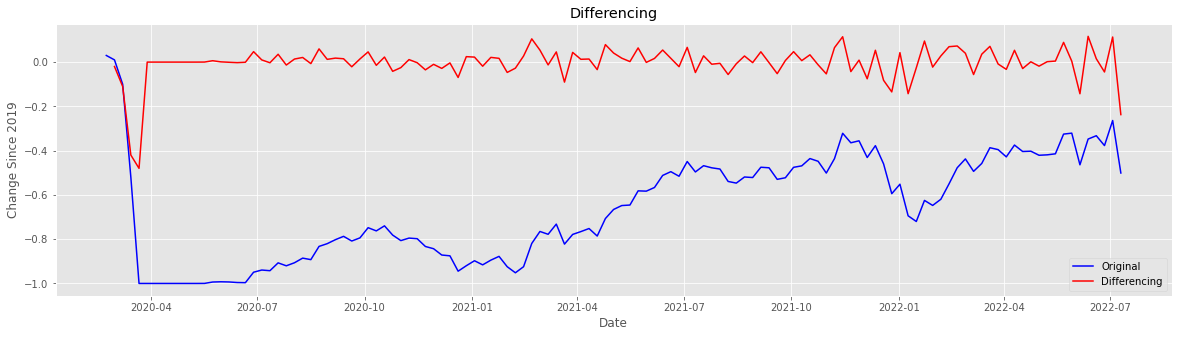

In [23]:
fig = plt.figure(figsize=(20, 5))
orig = plt.plot(NY, color='blue', label='Original')
diff = plt.plot(NY_new, color='red', label='Differencing')
plt.legend(loc='best')
plt.title('Differencing')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
plt.show(block=False)

This data certainly looks much more stationary, except for the initial drop in 2020 when the lockdown occurred. A separate forecast can be done without this lockdown to see how the results compare. 

### Los Angeles

In [24]:
LA_new = LA.diff().dropna()
LA_new.head()

2020-03-01    0.00
2020-03-08   -0.09
2020-03-15   -0.37
2020-03-22   -0.62
2020-03-29    0.00
Freq: W-SUN, Name: Los Angeles, dtype: float64

In [25]:
dftest = adfuller(LA_new)
display(dftest)

(-9.523771110050253,
 3.01584375569297e-16,
 0,
 123,
 {'1%': -3.4846672514209773,
  '5%': -2.8853397507076006,
  '10%': -2.5794629869786503},
 -258.4103080808833)

With a p-value of 3.01 e-16, differencing did make this data stationary. I will now plot the differenced data against the original data to see how they compare.

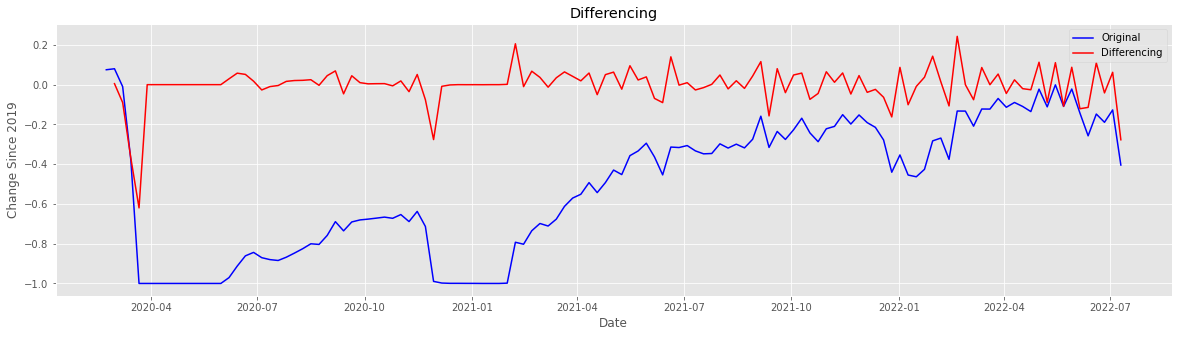

In [26]:
fig = plt.figure(figsize=(20, 5))
orig = plt.plot(LA, color='blue', label='Original')
diff = plt.plot(LA_new, color='red', label='Differencing')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
plt.legend(loc='best')
plt.title('Differencing')
plt.show(block=False)

Again, this data does look stationary, which will make time-series possible.

### New Orleans

In [27]:
NOLA_new = NOLA.diff().dropna()
NOLA_new.head()

2020-03-01   -0.28
2020-03-08    0.13
2020-03-15   -0.25
2020-03-22   -0.72
2020-03-29    0.00
Freq: W-SUN, Name: New Orleans, dtype: float64

In [28]:
dftest = adfuller(NOLA_new)
display(dftest)

(-14.515877424646723,
 5.626237418900106e-27,
 0,
 123,
 {'1%': -3.4846672514209773,
  '5%': -2.8853397507076006,
  '10%': -2.5794629869786503},
 -118.68515539301112)

New Orleans' p-value is 5.63 e-27, so this data is now stationary. I will plot the differenced data against the original data to see how they compare.

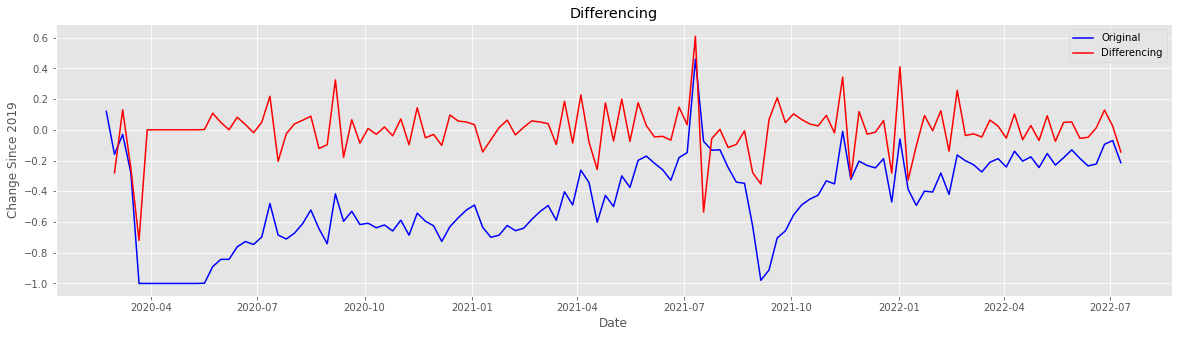

In [29]:
fig = plt.figure(figsize=(20, 5))
orig = plt.plot(NOLA, color='blue', label='Original')
diff = plt.plot(NOLA_new, color='red', label='Differencing')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
plt.title('Differencing')
plt.show(block=False)

With such a low p-value, it is a safe assumption that this data is relatively stationary, however, from looking at this graph, we still see some larger increases and decreases in the data that may need to be looked at further.

### Dallas

In [30]:
DAL_new = DAL.diff().dropna()
DAL_new.head()

2020-03-01    0.07
2020-03-08   -0.07
2020-03-15   -0.24
2020-03-22   -0.75
2020-03-29    0.00
Freq: W-SUN, Name: Dallas, dtype: float64

In [31]:
dftest = adfuller(DAL_new)
display(dftest)

(-6.76152504733432,
 2.7843641151806702e-09,
 2,
 121,
 {'1%': -3.485585145896754,
  '5%': -2.885738566292665,
  '10%': -2.5796759080663887},
 -206.69770146800215)

With a p-value of 2.78 e-09, differencing did make this data stationary. I will now plot the differenced data against the original data to see how they compare.

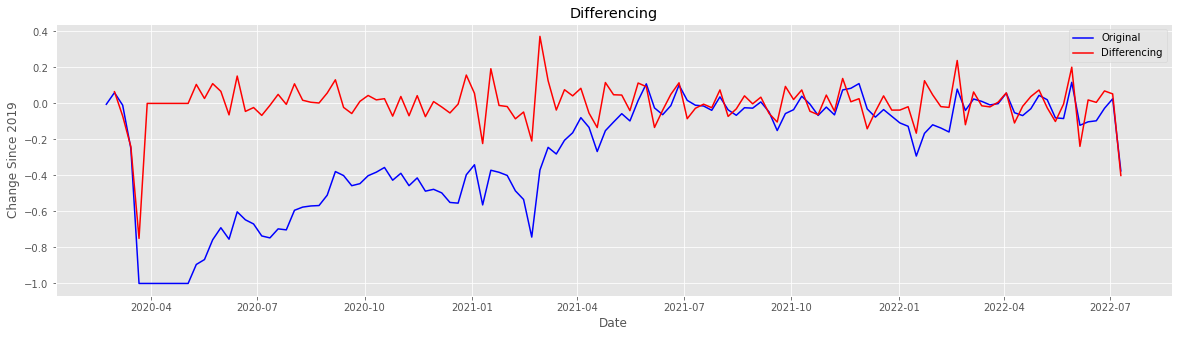

In [32]:
fig = plt.figure(figsize=(20, 5))
orig = plt.plot(DAL, color='blue', label='Original')
diff = plt.plot(DAL_new, color='red', label='Differencing')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
plt.title('Differencing')
plt.show(block=False)

Similar to LA, this data looks relatively stationary, making time-series possible.

### Miami

In [33]:
MIA_new = MIA.diff().dropna()
MIA_new.head()

2020-03-01    0.03
2020-03-08   -0.06
2020-03-15   -0.16
2020-03-22   -0.78
2020-03-29    0.00
Freq: W-SUN, Name: Miami, dtype: float64

In [34]:
dftest = adfuller(MIA_new)
display(dftest)

(-9.096009050301145,
 3.713481975098683e-15,
 1,
 122,
 {'1%': -3.4851223522012855,
  '5%': -2.88553750045158,
  '10%': -2.5795685622144586},
 -148.7789852465744)

With a p-value of 3.71 e-15, differencing did make this data stationary. I will now plot the differenced data against the original data to see how they compare.

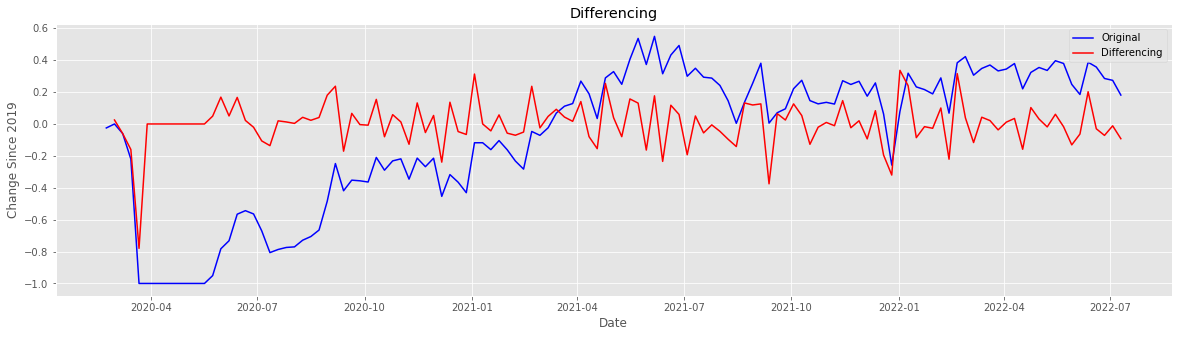

In [35]:
fig = plt.figure(figsize=(20, 5))
orig = plt.plot(MIA, color='blue', label='Original')
diff = plt.plot(MIA_new, color='red', label='Differencing')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
plt.title('Differencing')
plt.show(block=False)

Differencing certainly made this data more stationary and removed the linear trend.

### Phoenix

In [36]:
PHO_new = PHO.diff().dropna()
PHO_new.head()

2020-03-01   -0.02
2020-03-08   -0.06
2020-03-15   -0.19
2020-03-22   -0.73
2020-03-29   -0.00
Freq: W-SUN, Name: Phoenix, dtype: float64

In [37]:
dftest = adfuller(PHO_new)
display(dftest)

(-5.959080088802177,
 2.059549600768503e-07,
 7,
 116,
 {'1%': -3.4880216384691867,
  '5%': -2.8867966864160075,
  '10%': -2.5802408234244947},
 -180.7135037091573)

With a p-value of 2.06 e-07, differencing did make this data stationary. I will now plot the differenced data against the original data to see how they compare.

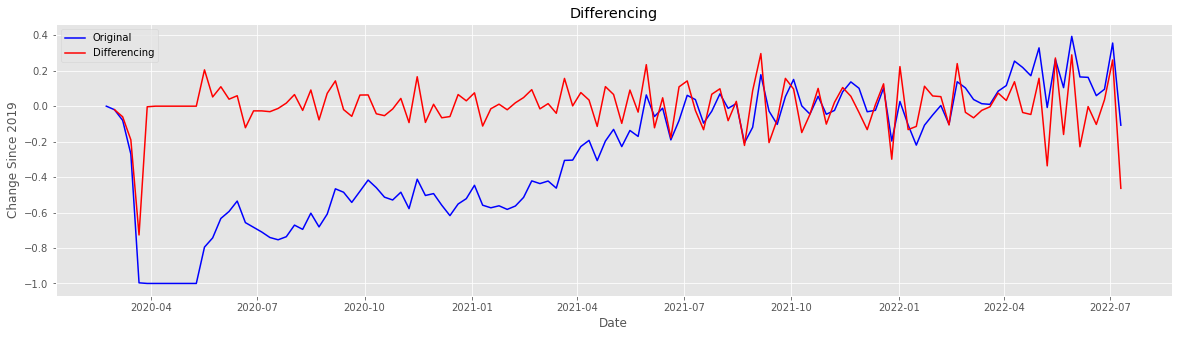

In [38]:
fig = plt.figure(figsize=(20, 5))
orig = plt.plot(PHO, color='blue', label='Original')
diff = plt.plot(PHO_new, color='red', label='Differencing')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
plt.title('Differencing')
plt.show(block=False)

Similar to Miami, differencing made this data more stationary and removed the linear trend.  

By just taking the difference of each city's data, all the data became stationary and can now be modeled using Time Series.

## Metrics Used for Evaluation

The metrics I will be using to evaluate my models are the AIC and RMSE (root mean squared error). Only the RMSE is calculated for the baseline models. The AIC is a metric that compares different models' performances, whereas the RMSE finds the actual error of a model's performance. I chose the RMSE because it is useful when there is a relatively small sample size and large errors because RMSE penalizes large errors.   

I will also look at the autocorrelation and partial autocorrelation graphs and the P-values to determine the models to create based on the lags.  

Lastly, once a final model is chosen, I will calculate the MAE (mean absolute error) to determine how far off my test predictions were from my actual data. The MAE is more easily interpretable because it is simply the average of the error (as opposed to the square root of it). By using the absolute values, the MAE measures the average magnitude of the errors without considering whether the predictions were higher or lower than the actual values. 

## New York City Modeling

I am going to use an 80%-20% train/test split. In order to do a train/test split for time series, I will split the data at the 80% cutoff so that the first 80% is the training data and the last 20% is the test data because the order of the data matters. Because all the data has the same number of rows, I can also use the same variable "cutoff" for the other 5 cities.

In [39]:
cutoff = round(NY.shape[0]*0.8)
cutoff

100

In [40]:
# Define train and test sets according to the index cutoff
NY_train = NY_new[:cutoff]
NY_test = NY_new[cutoff:]

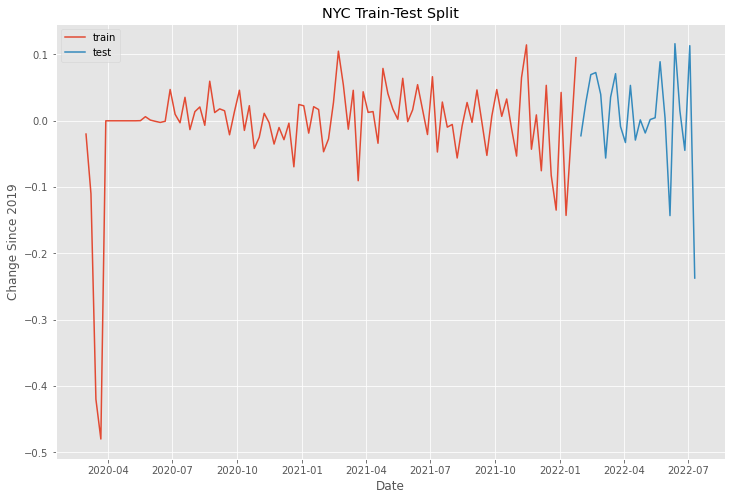

In [41]:
#visualize the train/test split

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(NY_train, label='train')
ax.plot(NY_test, label='test')
ax.set_title('NYC Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
plt.legend();

My baseline model is a shift of 1. This means that the forecasting will just be the data from the week before.

In [42]:
#Baseline Model

NY_naive = NY_train.shift(1).dropna()
NY_naive.head()

2020-03-08   -0.02
2020-03-15   -0.11
2020-03-22   -0.42
2020-03-29   -0.48
2020-04-05    0.00
Freq: W-SUN, Name: New York, dtype: float64

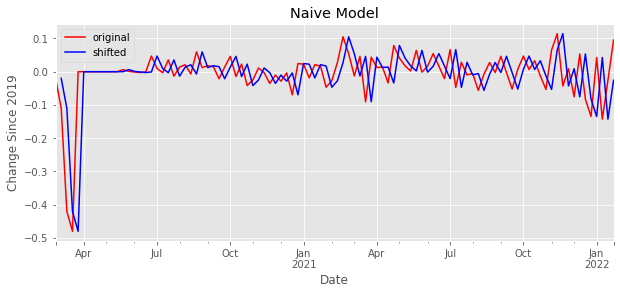

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))

NY_train[0:200].plot(ax=ax, c='r', label='original')
NY_naive[0:200].plot(ax=ax, c='b', label='shifted')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Naive Model')
ax.legend();

In [44]:
NY_naive_rmse = np.sqrt(mean_squared_error(NY_train[1:], NY_naive.dropna()))
NY_naive_rmse

0.08501601037570525

An RMSE of 0.085 sounds pretty low, but with nothing to compare it to it is hard to know. To make my first model, I will make autocorrelation and partial autocorrelation plots to see what the significant lags are. 

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


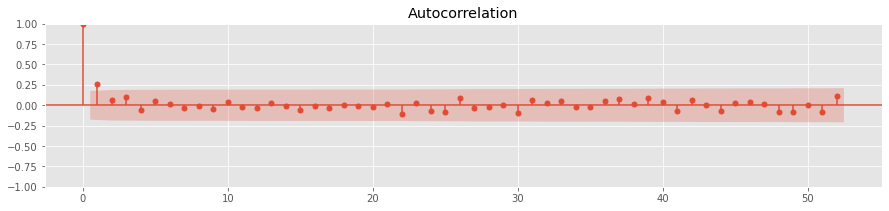

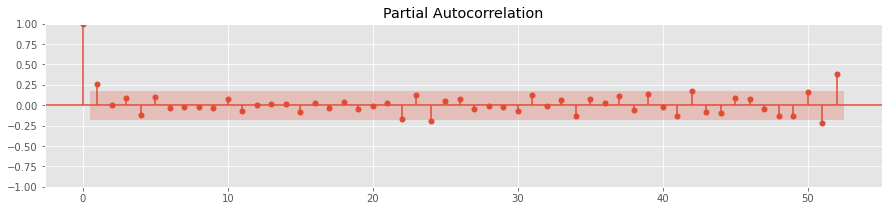

In [45]:
fig, ax = plt.subplots(figsize=(15,3))
plot_acf(NY_new, ax=ax, lags=52);

fig, ax = plt.subplots(figsize=(15,3))
plot_pacf(NY_new, ax=ax, lags=52);

The only siginficant lags are 1, so I will make my first ARIMA model with lags of 1 and a difference of 0, as I already took a difference to make my data stationary.

In [46]:
#First ARIMA model based on the autocorrelation and partial autocorrelation plots
NY_AR_1 = ARIMA(NY_train, order=(1, 0, 1)).fit()  
print(NY_AR_1.summary())

                               SARIMAX Results                                
Dep. Variable:               New York   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 123.033
Date:                Tue, 12 Jul 2022   AIC                           -238.066
Time:                        12:37:30   BIC                           -227.646
Sample:                    03-01-2020   HQIC                          -233.849
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0061      0.016     -0.375      0.707      -0.038       0.026
ar.L1          0.1762      0.198      0.890      0.373      -0.212       0.564
ma.L1          0.2536      0.231      1.099      0.2

In [47]:
#create test predictions
train_preds_1 = NY_AR_1.predict(typ='levels')
test_preds_1 = NY_AR_1.predict(start=NY_test.index[0], end=NY_test.index[-1],typ='levels')

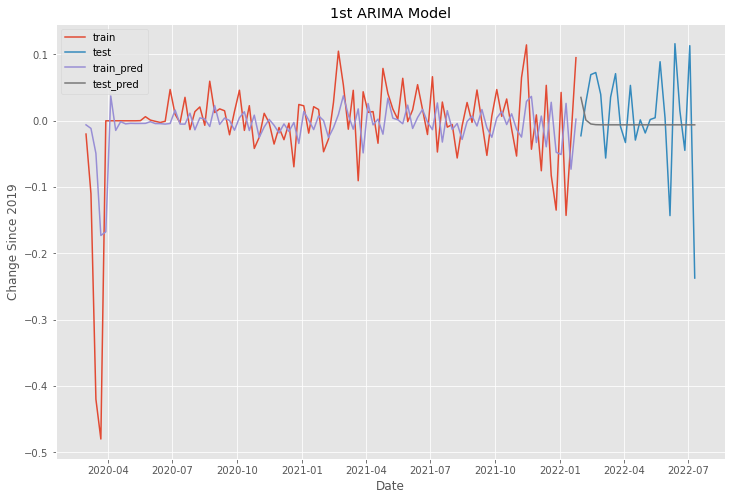

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(NY_train, label='train')
ax.plot(NY_test, label='test')
ax.plot(train_preds_1, label='train_pred')
ax.plot(test_preds_1, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('1st ARIMA Model')
plt.legend();

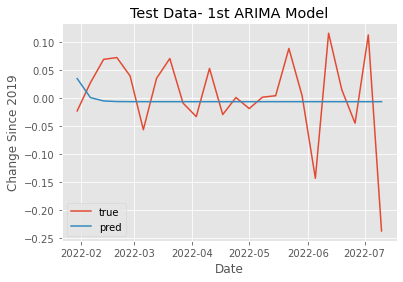

In [49]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(NY_test, label='true')
ax.plot(test_preds_1, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 1st ARIMA Model')

plt.legend();

My test predictions come out to essentially a straight line. This could mean that an ARIMA model is not the best model to use or that I don't have enough data to do a proper time series analysis. I will continue to try to optimize my parameters to see if I can create a better model. 

In [50]:
NY_AR_1_RMSE = np.sqrt(mean_squared_error(NY_test, test_preds_1))
NY_AR_1_RMSE

0.0779349925696799

My first ARIMA model has an RMSE of 0.078, which is slightly lower than my baseline model. I am now going to use the auto_model tool to find the optimal ARIMA model.

In [51]:
auto_model = pm.auto_arima(NY_train, start_p=1, start_q=1,
                      test='adf',       
                      max_p=10, max_q=10,
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-239.748, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-226.058, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-241.083, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-241.315, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-239.595, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-237.342, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-239.708, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.297 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 122.658
Date:                Tue, 12 Jul 2022   AIC                           -241.315
Time:                        12:37:31   BIC                           -236.105
Sample:                

In [52]:
#2nd ARIMA model given the results from the autocorrelation tool 
NY_AR_2 = ARIMA(NY_train, order=(0,0,1)).fit()  
print(NY_AR_2.summary())

                               SARIMAX Results                                
Dep. Variable:               New York   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 122.854
Date:                Tue, 12 Jul 2022   AIC                           -239.708
Time:                        12:37:31   BIC                           -231.893
Sample:                    03-01-2020   HQIC                          -236.545
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0063      0.014     -0.446      0.655      -0.034       0.021
ma.L1          0.4110      0.056      7.340      0.000       0.301       0.521
sigma2         0.0050      0.000     10.755      0.0

In [53]:
train_preds_2 = NY_AR_2.predict(typ='levels')
test_preds_2 = NY_AR_2.predict(start=NY_test.index[0], end=NY_test.index[-1],typ='levels')

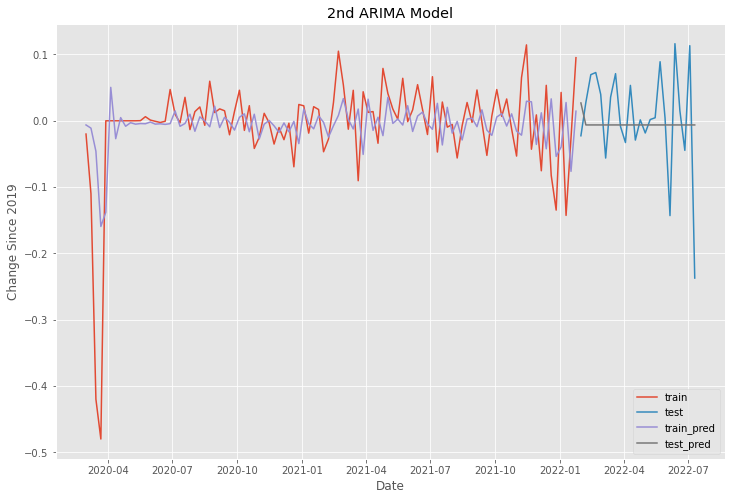

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(NY_train, label='train')
ax.plot(NY_test, label='test')
ax.plot(train_preds_2, label='train_pred')
ax.plot(test_preds_2, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('2nd ARIMA Model')

plt.legend();

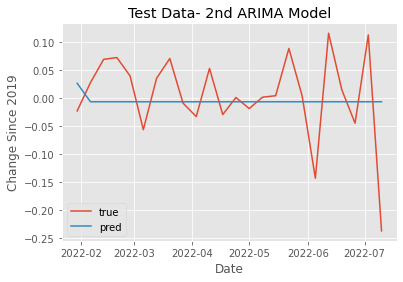

In [55]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(NY_test, label='true')
ax.plot(test_preds_2, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 2nd ARIMA Model')

plt.legend();

In [56]:
NY_AR_2_RMSE = np.sqrt(mean_squared_error(NY_test, test_preds_2))
NY_AR_2_RMSE

0.07790020656340368

The test predictions for both ARIMA models came out to essentially a straight line and very similar RMSE scores. I will try to improve my model's performance by including seasonality using a SARIMA model because restaurants generally have a level of seasonality. There is a slightly significant value at 24 weeks, according to the PACF. Because my data is weekly, a lag of 24 would be 6 months.

In [57]:
NY_SARIMA =SARIMAX(NY_train,
                  order=(0,0,1),
                  seasonal_order=(0,0,1,24),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
print(NY_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           New York   No. Observations:                  100
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 24)   Log Likelihood                 122.945
Date:                            Tue, 12 Jul 2022   AIC                           -239.891
Time:                                    12:37:31   BIC                           -232.075
Sample:                                03-01-2020   HQIC                          -236.728
                                     - 01-23-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4111      0.055      7.462      0.000       0.303       0.519
ma.S.L24      -0.1379      0.155   

In [58]:
train_preds_3 = NY_SARIMA.predict(typ='levels')
test_preds_3 = NY_SARIMA.predict(start=NY_test.index[0], end=NY_test.index[-1],typ='levels')

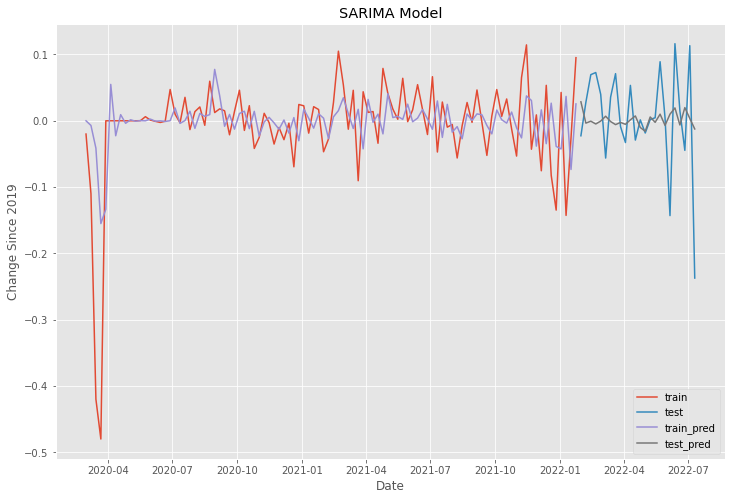

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(NY_train, label='train')
ax.plot(NY_test, label='test')
ax.plot(train_preds_3, label='train_pred')
ax.plot(test_preds_3, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('SARIMA Model')

plt.legend();

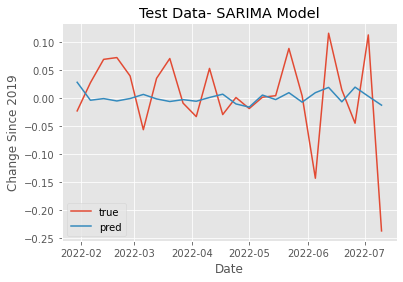

In [60]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(NY_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend();

In [61]:
NY_SARIMA_RMSE = np.sqrt(mean_squared_error(NY_test, test_preds_3))
NY_SARIMA_RMSE

0.07606652047833802

In [62]:
#compiled test scores

In [63]:
print(f'AR_1 AIC: {NY_AR_1.aic}' )
print(f'AR_2 AIC: {NY_AR_2.aic}' )
print(f'SMODEL AIC: {NY_SARIMA.aic}' )

AR_1 AIC: -238.06648354892698
AR_2 AIC: -239.70808916670165
SMODEL AIC: -239.8908425096513


In [64]:
print(f'Naive RMSE: {NY_naive_rmse}')
print(f'AR_1 RMSE: {NY_AR_1_RMSE}' )
print(f'AR_2 RMSE: {NY_AR_2_RMSE}' )
print(f'SMODEL RMSE: {NY_SARIMA_RMSE}' )

Naive RMSE: 0.08501601037570525
AR_1 RMSE: 0.0779349925696799
AR_2 RMSE: 0.07790020656340368
SMODEL RMSE: 0.07606652047833802


The SARIMA Model produced similar scores to the ARIMA models; however, the AIC and RMSE were slightly lower for the SARIMA model, and the predictions did have some fluctuations, so I will choose this to be my final model.    
Now that I have a final model, I will calculate the MAE (mean absolute error) to determine how far off my test predictions were from my actual data.

In [65]:
#final model- SARIMA

In [66]:
#Mean Absolute Error
NY_MAE = mean_absolute_error(NY_test,test_preds_3)*100
print(f'NY MAE: {NY_MAE:.2f}%')

NY MAE: 5.65%


My test predictions are 5.65% off from the true values.

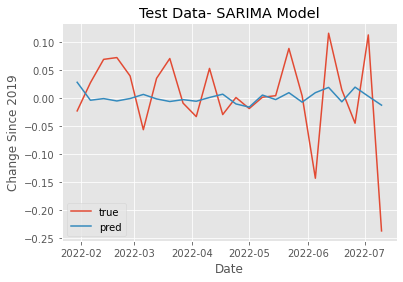

In [67]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(NY_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend()
plt.savefig('Images/Test_Preds/NYC_final_model_test_preds',bbox_inches='tight');

### Forecasting New York City

In [68]:
NY_SARIMA =SARIMAX(NY_test,
                  order=(0,0,1),
                  seasonal_order=(0,0,1,24),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
NY_forecast = NY_SARIMA.forecast(steps=12)
print(NY_forecast)

2022-07-17    0.08
2022-07-24    0.01
2022-07-31    0.02
2022-08-07    0.02
2022-08-14    0.01
2022-08-21   -0.01
2022-08-28    0.01
2022-09-04    0.02
2022-09-11   -0.00
2022-09-18   -0.01
2022-09-25    0.01
2022-10-02   -0.01
Freq: W-SUN, Name: predicted_mean, dtype: float64


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [69]:
#NYC Forecasting Mean
NY_forecast_mean = NY_forecast.mean()*100
print(f'NYC Forecasting Mean: {NY_forecast_mean:.2f}%')

NYC Forecasting Mean: 1.14%


NYC's average forecast is 1.14% higher than the 2019 baseline.

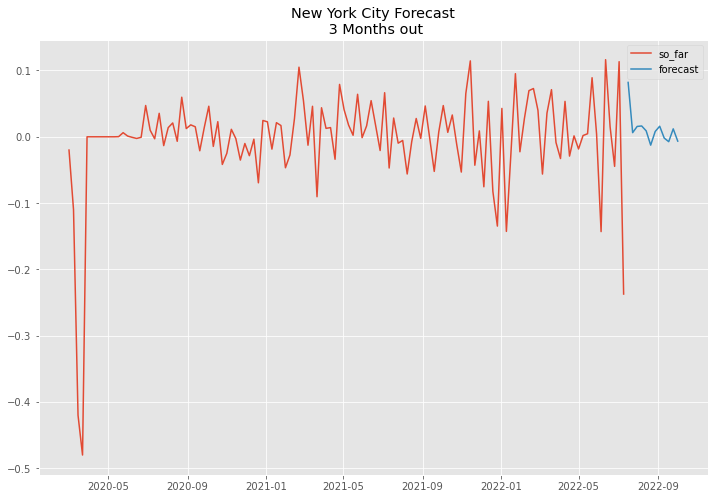

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(NY_new, label='so_far')
ax.plot(NY_forecast, label='forecast')
ax.set_title('New York City Forecast\n 3 Months out')

plt.legend()
plt.savefig('Images/Forecasts/NYC_forecast',bbox_inches='tight');

## Los Angeles Modeling

In [71]:
# Define train and test sets according to the index cutoff
# using the same index cutoff as NY because all cities have the same number of rows
LA_train = LA_new[:cutoff]
LA_test = LA_new[cutoff:]

In [72]:
#Baseline Model
LA_naive = LA_train.shift(1).dropna()
LA_naive.head()

2020-03-08    0.00
2020-03-15   -0.09
2020-03-22   -0.37
2020-03-29   -0.62
2020-04-05    0.00
Freq: W-SUN, Name: Los Angeles, dtype: float64

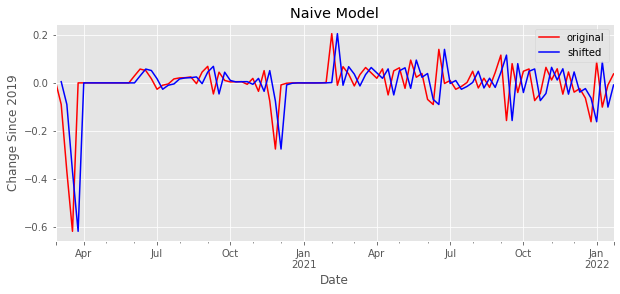

In [73]:
fig, ax = plt.subplots(figsize=(10, 4))

LA_train[0:200].plot(ax=ax, c='r', label='original')
LA_naive[0:200].plot(ax=ax, c='b', label='shifted')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Naive Model')
ax.legend();

In [74]:
LA_naive_rmse = np.sqrt(mean_squared_error(LA_train[1:], LA_naive.dropna()))
LA_naive_rmse

0.11459533898536936

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


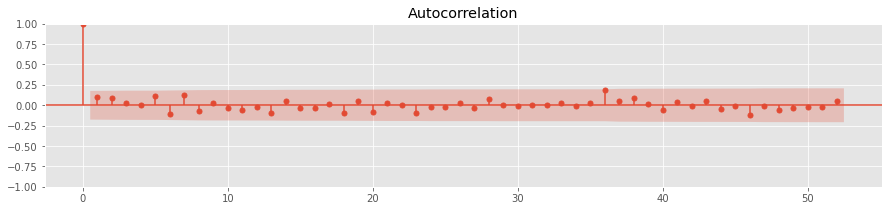

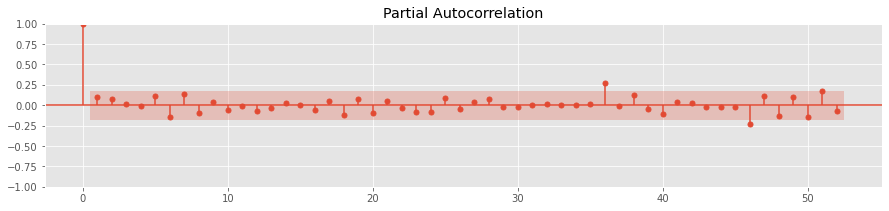

In [75]:
#look at autocorrelation and partial autocorrelation plots
fig, ax = plt.subplots(figsize=(15,3))
plot_acf(LA_new, ax=ax, lags=52);

fig, ax = plt.subplots(figsize=(15,3))
plot_pacf(LA_new, ax=ax, lags=52);

Based on the autocorrelation and partial autocorrelation plots above, it appears the only values with statistical significance are 0, which means that an ARIMA model is not a great option for this data. I will try an ARIMA model that takes a second difference. 

In [76]:
#First ARIMA model with a second difference taken
LA_AR_1 = ARIMA(LA_train, order=(0, 1, 0)).fit()  
print(LA_AR_1.summary())

                               SARIMAX Results                                
Dep. Variable:            Los Angeles   No. Observations:                  100
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  73.994
Date:                Tue, 12 Jul 2022   AIC                           -145.987
Time:                        12:37:32   BIC                           -143.392
Sample:                    03-01-2020   HQIC                          -144.937
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0131      0.001     15.750      0.000       0.011       0.015
Ljung-Box (L1) (Q):                  14.95   Jarque-Bera (JB):               298.44
Prob(Q):                              0.00   Pr

In [77]:
train_preds_1 = LA_AR_1.predict(typ='levels')
test_preds_1 = LA_AR_1.predict(start=LA_test.index[0], end=LA_test.index[-1],typ='levels')

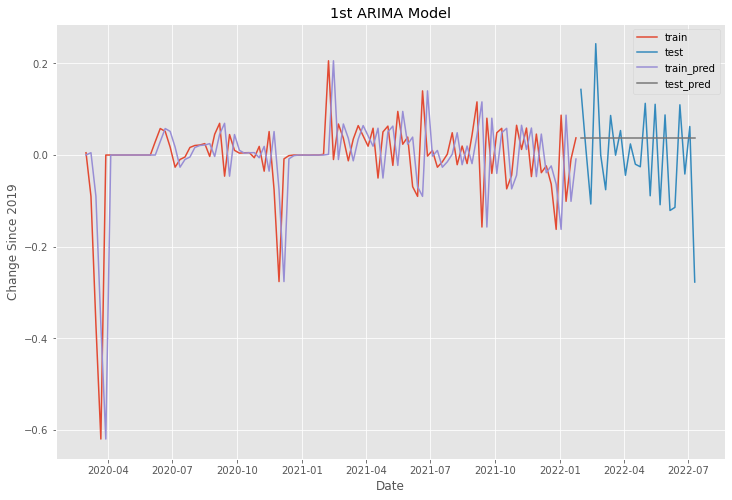

In [78]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(LA_train, label='train')
ax.plot(LA_test, label='test')
ax.plot(train_preds_1, label='train_pred')
ax.plot(test_preds_1, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('1st ARIMA Model')
plt.legend();

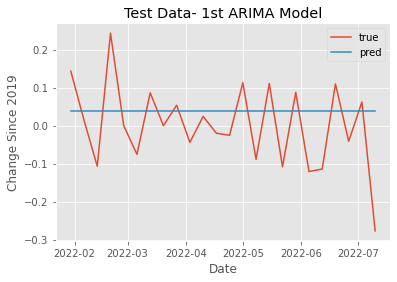

In [79]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(LA_test, label='true')
ax.plot(test_preds_1, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 1st ARIMA Model')

plt.legend();

In [80]:
LA_AR_1_RMSE = np.sqrt(mean_squared_error(LA_test, test_preds_1))
LA_AR_1_RMSE

0.11499876086288932

This first ARIMA model produced an RMSE very similar to the baseline. Again, an ARIMA model might not be a good option for this data, but I will use the auto_model tool to see if there are better parameters I can use. 

In [81]:
#Use auto_model tool to find the optimal ARIMA model 

auto_model = pm.auto_arima(LA_train, start_p=1, start_q=1,
                      test='adf',       
                      max_p=10, max_q=10,
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-190.593, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-187.617, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-192.544, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-191.960, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-190.591, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-188.601, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-190.703, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.221 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  98.272
Date:                Tue, 12 Jul 2022   AIC                           -192.544
Time:                        12:37:33   BIC                           -187.334
Sample:                

In [82]:
#2nd ARIMA model given the autocorrelation tool 
LA_AR_2 = ARIMA(LA_train, order=(1,0,0)).fit()  
print(LA_AR_2.summary())

                               SARIMAX Results                                
Dep. Variable:            Los Angeles   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  98.351
Date:                Tue, 12 Jul 2022   AIC                           -190.703
Time:                        12:37:33   BIC                           -182.887
Sample:                    03-01-2020   HQIC                          -187.540
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.017     -0.283      0.777      -0.038       0.029
ar.L1          0.2554      0.059      4.301      0.000       0.139       0.372
sigma2         0.0082      0.001     11.106      0.0

In [83]:
train_preds_2 = LA_AR_2.predict(typ='levels')
test_preds_2 = LA_AR_2.predict(start=LA_test.index[0], end=LA_test.index[-1],typ='levels')

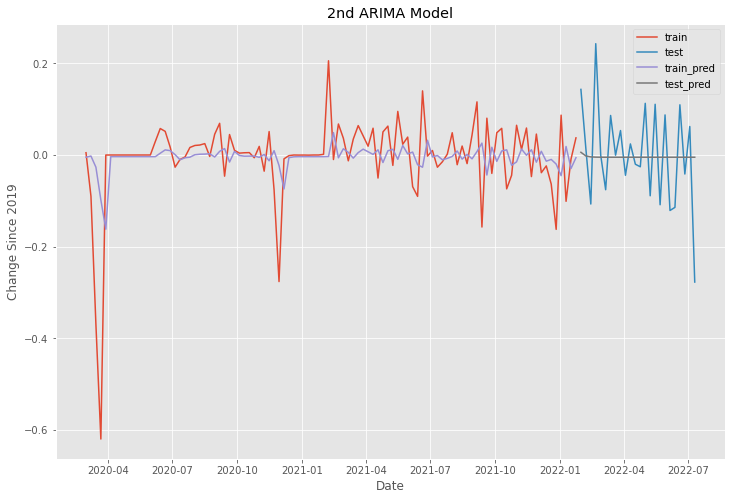

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(LA_train, label='train')
ax.plot(LA_test, label='test')
ax.plot(train_preds_2, label='train_pred')
ax.plot(test_preds_2, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('2nd ARIMA Model')

plt.legend();

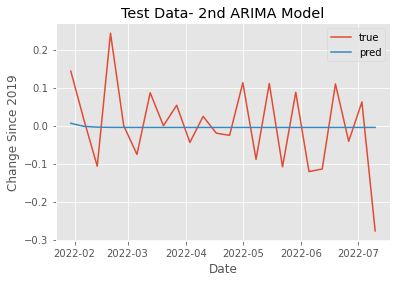

In [85]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(LA_test, label='true')
ax.plot(test_preds_2, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 2nd ARIMA Model')

plt.legend();

In [86]:
LA_AR_2_RMSE = np.sqrt(mean_squared_error(LA_test, test_preds_2))
LA_AR_2_RMSE

0.10860691595371746

This second ARIMA model produced a lower AIC and RMSE; however, the test predictions for both ARIMA models came out to essentially a straight line and similar RMSE scores. I will try to improve my model performance by including seasonality using a SARIMA model. According to the PACF, there is a significant value at 36 weeks.

In [87]:
LA_SARIMA =SARIMAX(LA_train,
                  order=(1,0,0),
                  seasonal_order=(1,0,0,36),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
print(LA_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Los Angeles   No. Observations:                  100
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 36)   Log Likelihood                 103.038
Date:                            Tue, 12 Jul 2022   AIC                           -200.075
Time:                                    12:37:34   BIC                           -192.260
Sample:                                03-01-2020   HQIC                          -196.912
                                     - 01-23-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2400      0.061      3.928      0.000       0.120       0.360
ar.S.L36       0.3950      0.110   

In [88]:
train_preds_3 = LA_SARIMA.predict(typ='levels')
test_preds_3 = LA_SARIMA.predict(start=LA_test.index[0], end=LA_test.index[-1],typ='levels')

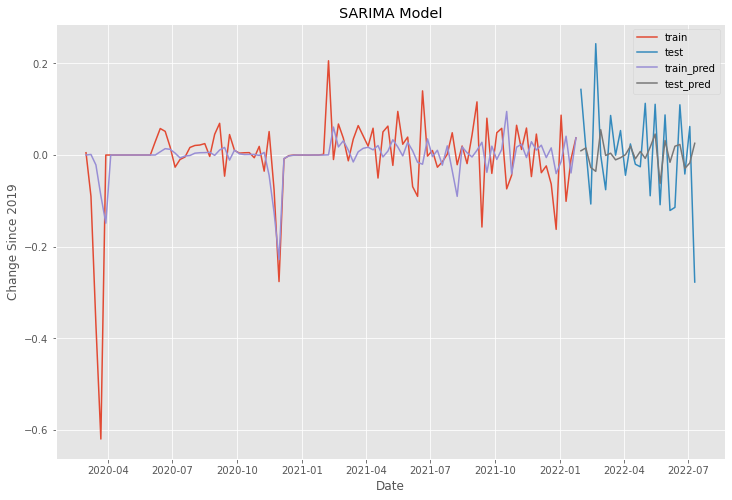

In [89]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(LA_train, label='train')
ax.plot(LA_test, label='test')
ax.plot(train_preds_3, label='train_pred')
ax.plot(test_preds_3, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('SARIMA Model')

plt.legend();

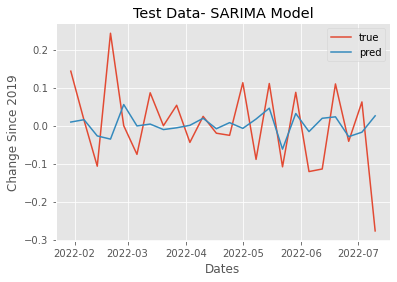

In [90]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(LA_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Dates')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend();

In [91]:
LA_SARIMA_RMSE = np.sqrt(mean_squared_error(LA_test, test_preds_3))
LA_SARIMA_RMSE

0.11072304081621363

In [92]:
#compiled test scores

In [93]:
print(f'AR_1 AIC: {LA_AR_1.aic}' )
print(f'AR_2 AIC: {LA_AR_2.aic}' )
print(f'SMODEL AIC: {LA_SARIMA.aic}' )

AR_1 AIC: -145.98710381510156
AR_2 AIC: -190.70281525920504
SMODEL AIC: -200.07531254597686


In [94]:
print(f'Naive RMSE: {LA_naive_rmse}')
print(f'AR_1 RMSE: {LA_AR_1_RMSE}' )
print(f'AR_2 RMSE: {LA_AR_2_RMSE}' )
print(f'SMODEL RMSE: {LA_SARIMA_RMSE}' )

Naive RMSE: 0.11459533898536936
AR_1 RMSE: 0.11499876086288932
AR_2 RMSE: 0.10860691595371746
SMODEL RMSE: 0.11072304081621363


The SARIMA Model produced a lower AIC than both ARIMA models and a very similar RMSE. The SARIMA model did give predictions that fluctuated, as opposed to the ARIMA models, which had predictions that were a straight line at 0. Therefore, I will choose the SARIMA model to be my final model. I am again going to calculate the MAE of this model to determine how far off my test predictions were from my actual data.  

In [95]:
#final model- SARIMA

In [96]:
#Mean Absolute Error
LA_MAE = mean_absolute_error(LA_test,test_preds_3)*100
print(f'LA MAE: {LA_MAE:.2f}%')

LA MAE: 8.27%


My test predictions are 8.27% off from the true values.

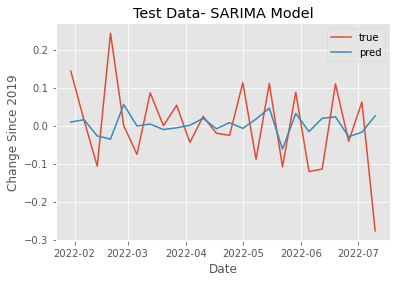

In [97]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(LA_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend()
plt.savefig('Images/Test_Preds/LA_final_model_test_preds',bbox_inches='tight');

### Forecasting Los Angeles

In [98]:
LA_SARIMA =SARIMAX(LA_test,
                  order=(1,0,0),
                  seasonal_order=(1,0,0,36),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
LA_forecast = LA_SARIMA.forecast(steps=12)
print(LA_forecast)

2022-07-17    0.16
2022-07-24   -0.09
2022-07-31    0.05
2022-08-07   -0.03
2022-08-14    0.02
2022-08-21   -0.01
2022-08-28    0.01
2022-09-04   -0.00
2022-09-11    0.00
2022-09-18   -0.00
2022-09-25    0.00
2022-10-02   -0.00
Freq: W-SUN, Name: predicted_mean, dtype: float64


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [99]:
#LA Forecasting Mean
LA_forecast_mean = LA_forecast.mean()*100
print(f'LA Forecasting Mean: {LA_forecast_mean:.2f}%')

LA Forecasting Mean: 0.83%


LA's forecast is similar to NYC in that it is slightly above the baseline. 

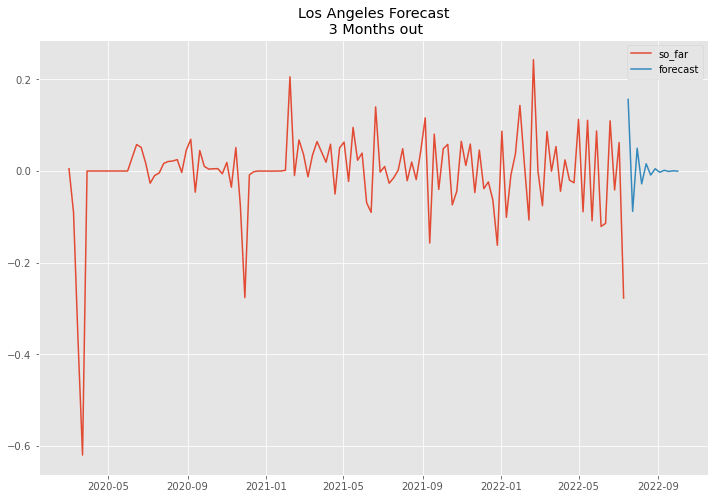

In [100]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(LA_new, label='so_far')
ax.plot(LA_forecast, label='forecast')
ax.set_title('Los Angeles Forecast\n 3 Months out')

plt.legend()
plt.savefig('Images/Forecasts/LA_forecast',bbox_inches='tight');

## New Orleans Modeling

In [101]:
# Define train and test sets according to the index cutoff
# using the same index cutoff as NY because all cities have the same number of rows
NOLA_train = NOLA_new[:cutoff]
NOLA_test = NOLA_new[cutoff:]

In [102]:
#Baseline Model

NOLA_naive = NOLA_train.shift(1).dropna()
NOLA_naive.head()

2020-03-08   -0.28
2020-03-15    0.13
2020-03-22   -0.25
2020-03-29   -0.72
2020-04-05    0.00
Freq: W-SUN, Name: New Orleans, dtype: float64

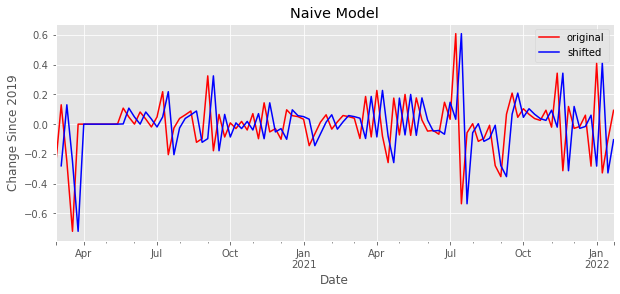

In [103]:
fig, ax = plt.subplots(figsize=(10, 4))

NOLA_train[0:200].plot(ax=ax, c='r', label='original')
NOLA_naive[0:200].plot(ax=ax, c='b', label='shifted')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Naive Model')
ax.legend();

In [104]:
NOLA_naive_rmse = np.sqrt(mean_squared_error(NOLA_train[1:], NOLA_naive.dropna()))
NOLA_naive_rmse

0.2717849534265849

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


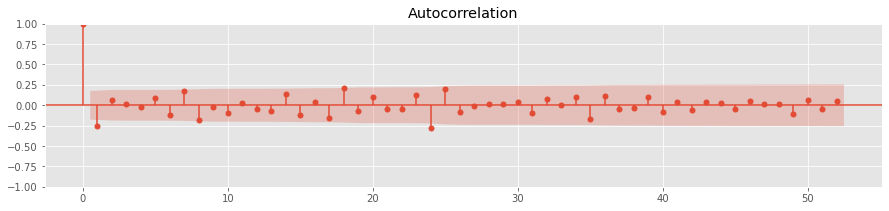

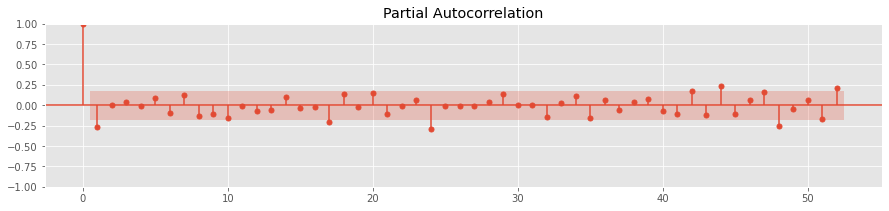

In [105]:
#look at autocorrelation and partial autocorrelation plots
fig, ax = plt.subplots(figsize=(15,3))
plot_acf(NOLA_new, ax=ax, lags=52);

fig, ax = plt.subplots(figsize=(15,3))
plot_pacf(NOLA_new, ax=ax, lags=52);

In [106]:
#First ARIMA model given ACF and PACF plots
NOLA_AR_1 = ARIMA(NOLA_train, order=(1, 0, 1)).fit()  
print(NOLA_AR_1.summary())

                               SARIMAX Results                                
Dep. Variable:            New Orleans   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  37.117
Date:                Tue, 12 Jul 2022   AIC                            -66.234
Time:                        12:37:35   BIC                            -55.814
Sample:                    03-01-2020   HQIC                           -62.017
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.015     -0.324      0.746      -0.034       0.024
ar.L1         -0.2513      0.468     -0.537      0.591      -1.168       0.665
ma.L1          0.0010      0.485      0.002      0.9

In [107]:
train_preds_1 = NOLA_AR_1.predict(typ='levels')
test_preds_1 = NOLA_AR_1.predict(start=NOLA_test.index[0], end=NOLA_test.index[-1],typ='levels')

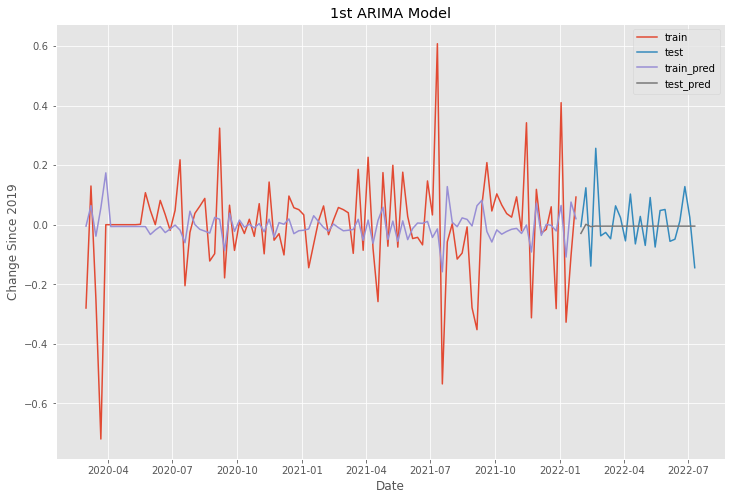

In [108]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(NOLA_train, label='train')
ax.plot(NOLA_test, label='test')
ax.plot(train_preds_1, label='train_pred')
ax.plot(test_preds_1, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('1st ARIMA Model')
plt.legend();

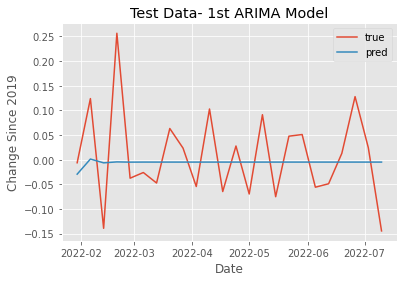

In [109]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(NOLA_test, label='true')
ax.plot(test_preds_1, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 1st ARIMA Model')

plt.legend();

In [110]:
NOLA_AR_1_RMSE = np.sqrt(mean_squared_error(NOLA_test, test_preds_1))
NOLA_AR_1_RMSE

0.09035857369772056

This first ARIMA model performed significantly better than the ARIMA model, however, the test predictions are still a straight line at 0. I will now use the auto_model tool again to try to optimize the parameters.

In [111]:
#Use auto_model tool to find the optimal ARIMA model 

auto_model = pm.auto_arima(NOLA_train, start_p=1, start_q=1,
                      test='adf',       
                      max_p=10, max_q=10,
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-68.104, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-65.796, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-70.104, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-69.612, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-68.104, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-66.153, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-68.234, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.168 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  37.052
Date:                Tue, 12 Jul 2022   AIC                            -70.104
Time:                        12:37:35   BIC                            -64.893
Sample:                       

According to the autocorrelation tool, the best ARIMA model for this data is (1,0,0) so I am going to try that and see how the results compare to the previous model 

In [112]:
#2nd ARIMA model given the autocorrelation tool
NOLA_AR_2 = ARIMA(NOLA_train, order=(1,0,0)).fit()  
print(NOLA_AR_2.summary())

                               SARIMAX Results                                
Dep. Variable:            New Orleans   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                  37.117
Date:                Tue, 12 Jul 2022   AIC                            -68.234
Time:                        12:37:35   BIC                            -60.419
Sample:                    03-01-2020   HQIC                           -65.071
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0048      0.014     -0.346      0.729      -0.032       0.023
ar.L1         -0.2503      0.073     -3.433      0.001      -0.393      -0.107
sigma2         0.0278      0.002     12.627      0.0

In [113]:
train_preds_2 = NOLA_AR_2.predict(typ='levels')
test_preds_2 = NOLA_AR_2.predict(start=NOLA_test.index[0], end=NOLA_test.index[-1],typ='levels')

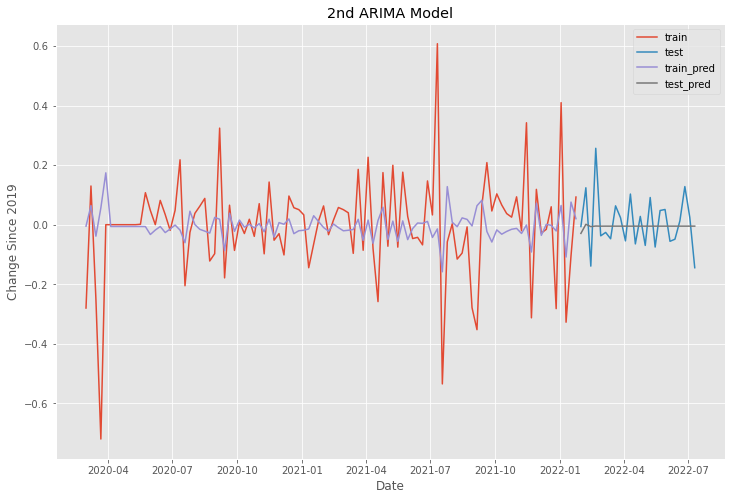

In [114]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(NOLA_train, label='train')
ax.plot(NOLA_test, label='test')
ax.plot(train_preds_2, label='train_pred')
ax.plot(test_preds_2, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('2nd ARIMA Model')

plt.legend();

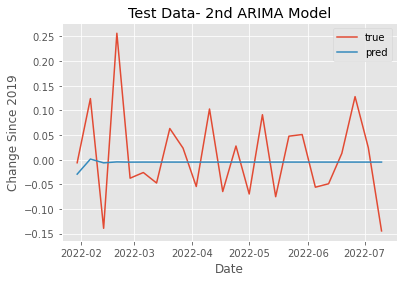

In [115]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(NOLA_test, label='true')
ax.plot(test_preds_2, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 2nd ARIMA Model')

plt.legend();

In [116]:
NOLA_AR_2_RMSE = np.sqrt(mean_squared_error(NOLA_test, test_preds_2))
NOLA_AR_2_RMSE

0.09036135842806801

This second ARIMA model produced a very similar AIC and RMSE to the first ARIMA model. I will now try a SARIMA model with the same metrics as the second ARIMA model but a seasonality component with a lag of 24 (given the PACF above).

In [117]:
NOLA_SARIMA =SARIMAX(NOLA_train,
                  order=(1,0,0),
                  seasonal_order=(1,0,0,24),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
print(NOLA_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        New Orleans   No. Observations:                  100
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 24)   Log Likelihood                  40.397
Date:                            Tue, 12 Jul 2022   AIC                            -74.794
Time:                                    12:37:36   BIC                            -66.979
Sample:                                03-01-2020   HQIC                           -71.631
                                     - 01-23-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1864      0.072     -2.605      0.009      -0.327      -0.046
ar.S.L24      -0.3243      0.120   

In [118]:
train_preds_3 = NOLA_SARIMA.predict(typ='levels')
test_preds_3 = NOLA_SARIMA.predict(start=NOLA_test.index[0], end=NOLA_test.index[-1],typ='levels')

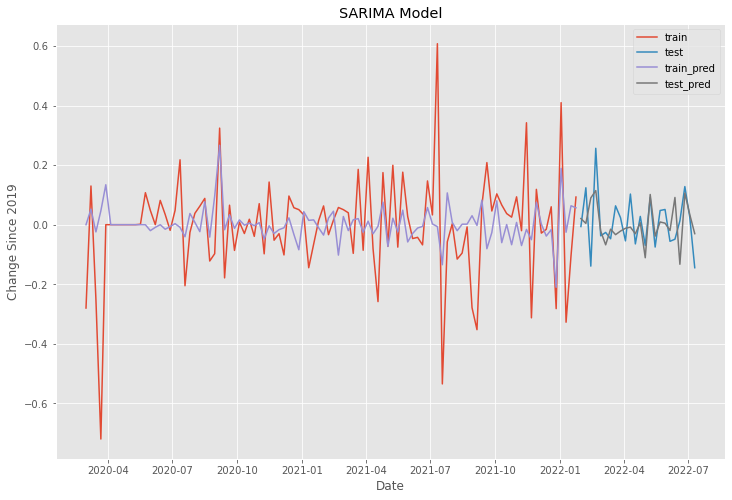

In [119]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(NOLA_train, label='train')
ax.plot(NOLA_test, label='test')
ax.plot(train_preds_3, label='train_pred')
ax.plot(test_preds_3, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('SARIMA Model')

plt.legend();

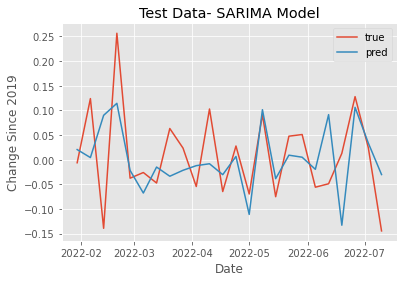

In [120]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(NOLA_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend();

In [121]:
NOLA_SARIMA_RMSE = np.sqrt(mean_squared_error(NOLA_test, test_preds_3))
NOLA_SARIMA_RMSE

0.08676133974687605

In [122]:
#compiled test scores

In [123]:
print(f'AR_1 AIC: {NOLA_AR_1.aic}' )
print(f'AR_2 AIC: {NOLA_AR_2.aic}' )
print(f'SMODEL AIC: {NOLA_SARIMA.aic}' )

AR_1 AIC: -66.23420163273155
AR_2 AIC: -68.23419042282174
SMODEL AIC: -74.79402199807566


In [124]:
print(f'Naive RMSE: {NOLA_naive_rmse}')
print(f'AR_1 RMSE: {NOLA_AR_1_RMSE}' )
print(f'AR_2 RMSE: {NOLA_AR_2_RMSE}' )
print(f'SMODEL RMSE: {NOLA_SARIMA_RMSE}' )

Naive RMSE: 0.2717849534265849
AR_1 RMSE: 0.09035857369772056
AR_2 RMSE: 0.09036135842806801
SMODEL RMSE: 0.08676133974687605


The SARIMA model performed significantly better than either ARIMA model, meaning there is a seasonality component to New Orleans' data. I will choose this to be my final model.  

In [125]:
#final model- SARIMA

In [126]:
#Mean Absolute Error
NOLA_MAE = mean_absolute_error(NOLA_test,test_preds_3)*100
print(f'NOLA MAE: {NOLA_MAE:.2f}%')

NOLA MAE: 6.66%


My test predictions are 6.66% off from the true values.

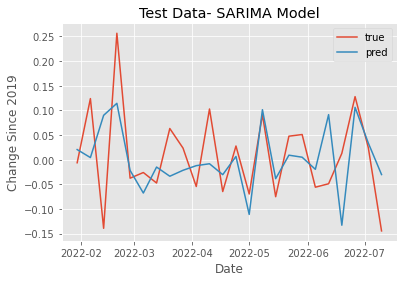

In [127]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(NOLA_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend()
plt.savefig('Images/Test_Preds/NOLA_final_model_test_preds',bbox_inches='tight');

### Forecasting New Orleans

In [128]:
NOLA_SARIMA =SARIMAX(NOLA_test,
                  order=(1,0,0),
                  seasonal_order=(1,0,0,24),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
NOLA_forecast = NOLA_SARIMA.forecast(steps=12)
print(NOLA_forecast)

2022-07-17    0.07
2022-07-24   -0.05
2022-07-31    0.04
2022-08-07   -0.05
2022-08-14    0.01
2022-08-21    0.00
2022-08-28    0.01
2022-09-04   -0.01
2022-09-11   -0.00
2022-09-18    0.01
2022-09-25   -0.01
2022-10-02    0.01
Freq: W-SUN, Name: predicted_mean, dtype: float64


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [129]:
#NOLA Forecasting Mean
NOLA_forecast_mean = NOLA_forecast.mean()*100
print(f'NOLA Forecasting Mean: {NOLA_forecast_mean:.2f}%')

NOLA Forecasting Mean: 0.18%


Similarly to the previous cities, New Orleans' forecast is slightly above the baseline. 

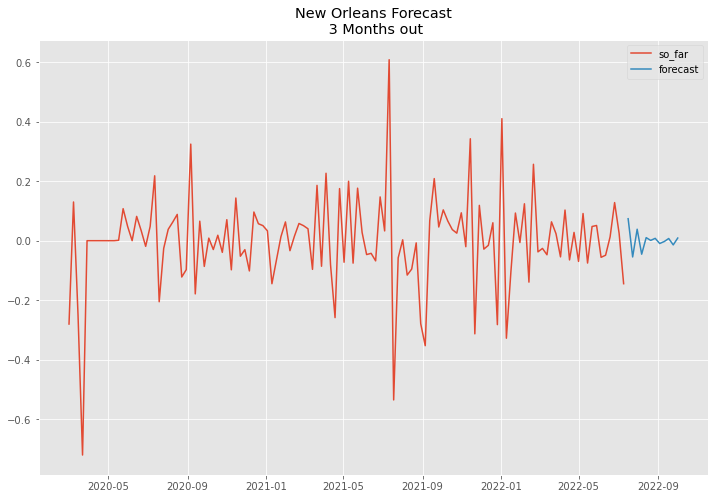

In [130]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(NOLA_new, label='so_far')
ax.plot(NOLA_forecast, label='forecast')
ax.set_title('New Orleans Forecast\n 3 Months out')

plt.legend()
plt.savefig('Images/Forecasts/NOLA_forecast',bbox_inches='tight');

## Dallas Modeling

In [131]:
# Define train and test sets according to the index cutoff
# using the same index cutoff as NY because all cities have the same number of rows
DAL_train = DAL_new[:cutoff]
DAL_test = DAL_new[cutoff:]

In [132]:
#Baseline Model

DAL_naive = DAL_train.shift(1).dropna()
DAL_naive.head()

2020-03-08    0.07
2020-03-15   -0.07
2020-03-22   -0.24
2020-03-29   -0.75
2020-04-05    0.00
Freq: W-SUN, Name: Dallas, dtype: float64

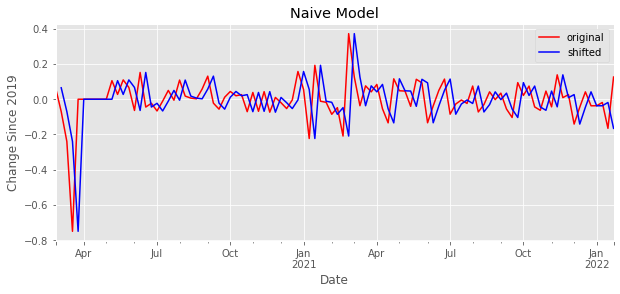

In [133]:
fig, ax = plt.subplots(figsize=(10, 4))

DAL_train[0:200].plot(ax=ax, c='r', label='original')
DAL_naive[0:200].plot(ax=ax, c='b', label='shifted')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Naive Model')
ax.legend();

In [134]:
DAL_naive_rmse = np.sqrt(mean_squared_error(DAL_train[1:], DAL_naive.dropna()))
DAL_naive_rmse

0.1597009588657071

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


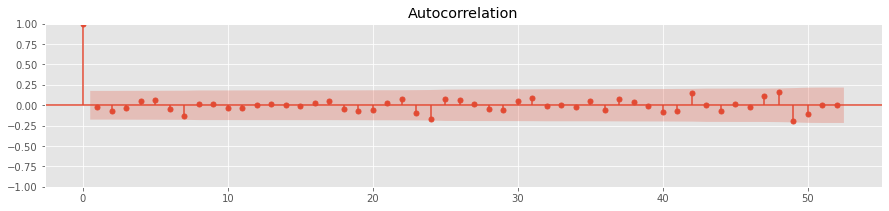

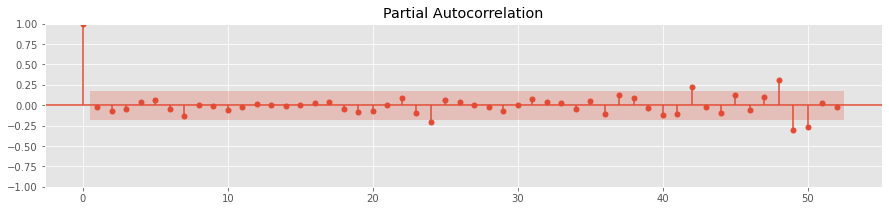

In [135]:
#look at autocorrelation and partial autocorrelation plots
fig, ax = plt.subplots(figsize=(15,3))
plot_acf(DAL_new, ax=ax, lags=52);

fig, ax = plt.subplots(figsize=(15,3))
plot_pacf(DAL_new, ax=ax, lags=52);

As with LA, the autocorrelation and partial autocorrelation plots show that the only values with statistical significance are 0, which means an ARIMA model is not a great option for this data. I will try an ARIMA model that takes a second difference to see if that helps. 

In [136]:
DAL_AR_1 = ARIMA(DAL_train, order=(0, 1, 0)).fit()  
print(DAL_AR_1.summary())

                               SARIMAX Results                                
Dep. Variable:                 Dallas   No. Observations:                  100
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  41.136
Date:                Tue, 12 Jul 2022   AIC                            -80.272
Time:                        12:37:37   BIC                            -77.677
Sample:                    03-01-2020   HQIC                           -79.222
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0255      0.002     13.953      0.000       0.022       0.029
Ljung-Box (L1) (Q):                  19.30   Jarque-Bera (JB):               168.28
Prob(Q):                              0.00   Pr

In [137]:
train_preds_1 = DAL_AR_1.predict(typ='levels')
test_preds_1 = DAL_AR_1.predict(start=DAL_test.index[0], end=DAL_test.index[-1],typ='levels')

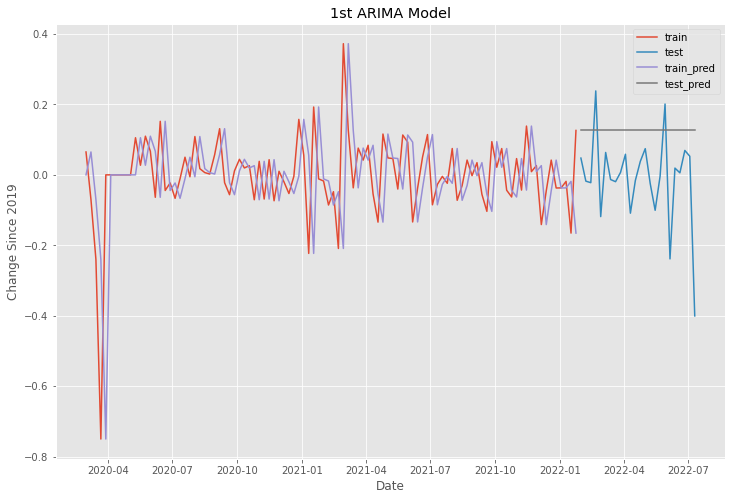

In [138]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(DAL_train, label='train')
ax.plot(DAL_test, label='test')
ax.plot(train_preds_1, label='train_pred')
ax.plot(test_preds_1, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('1st ARIMA Model')
plt.legend();

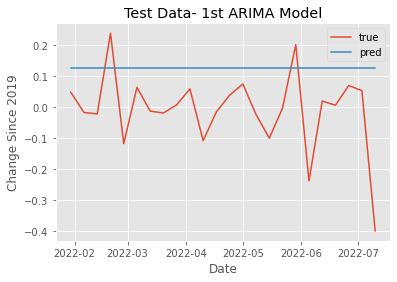

In [139]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(DAL_test, label='true')
ax.plot(test_preds_1, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 1st ARIMA Model')

plt.legend();

In [140]:
DAL_AR_1_RMSE = np.sqrt(mean_squared_error(DAL_test, test_preds_1))
DAL_AR_1_RMSE

0.1839036738349726

This first ARIMA model produced a higher RMSE than the baseline model, so it will certainly not be my final model. 

In [141]:
#Use auto_model tool to find the optimal ARIMA model 

auto_model = pm.auto_arima(DAL_train, start_p=1, start_q=1,
                      test='adf',       
                      max_p=10, max_q=10,
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-141.572, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-145.215, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-143.495, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-143.521, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-143.235, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.126 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                  73.608
Date:                Tue, 12 Jul 2022   AIC                           -145.215
Time:                        12:37:38   BIC                           -142.610
Sample:                             0   HQIC                          -144.161
                                - 100                                       

The autocorrelation tool did not provide any model that would help optimize the parameters, which again signifies that an ARIMA model is not a great option for this data. I will try another standard model to see how it compares to my first model.

In [142]:
#Second ARIMA model
DAL_AR_2 = ARIMA(DAL_train, order=(1,0,1)).fit()  
print(DAL_AR_2.summary())

                               SARIMAX Results                                
Dep. Variable:                 Dallas   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  73.794
Date:                Tue, 12 Jul 2022   AIC                           -139.587
Time:                        12:37:38   BIC                           -129.167
Sample:                    03-01-2020   HQIC                          -135.370
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.017     -0.086      0.931      -0.036       0.033
ar.L1         -0.2235      2.981     -0.075      0.940      -6.065       5.618
ma.L1          0.2820      2.997      0.094      0.9

The p-values here are well above the standard confidence interval of 0.05, making this not a great model. However, the AIC is lower than the first ARIMA model, so let's see how the RMSE compares.

In [143]:
train_preds_2 = DAL_AR_2.predict(typ='levels')
test_preds_2 = DAL_AR_2.predict(start=DAL_test.index[0], end=DAL_test.index[-1],typ='levels')

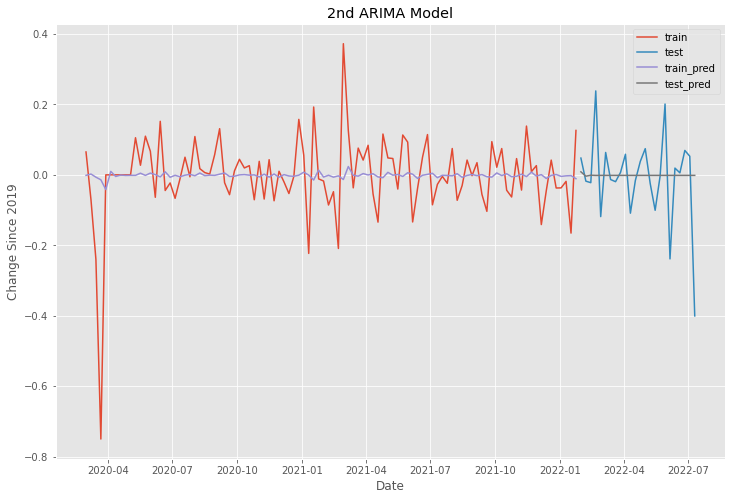

In [144]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(DAL_train, label='train')
ax.plot(DAL_test, label='test')
ax.plot(train_preds_2, label='train_pred')
ax.plot(test_preds_2, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('2nd ARIMA Model')

plt.legend();

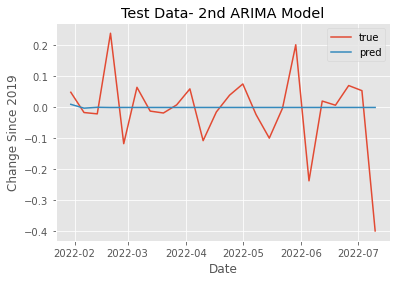

In [145]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(DAL_test, label='true')
ax.plot(test_preds_2, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 2nd ARIMA Model')

plt.legend();

In [146]:
DAL_AR_2_RMSE = np.sqrt(mean_squared_error(DAL_test, test_preds_2))
DAL_AR_2_RMSE

0.12517223304159336

The RMSE is lower for this second model, but the test predictions still came out to a straight line. I will now try a seasonal ARIMA model to see if that fits better. There is a significant value at 24 weeks according to the PACF, so I will try a SARIMA model with a lag of 24. 

In [147]:
DAL_SARIMA =SARIMAX(DAL_train,
                  order=(1,0,1),
                  seasonal_order=(1,0,1,24),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
print(DAL_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Dallas   No. Observations:                  100
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood                  76.369
Date:                            Tue, 12 Jul 2022   AIC                           -142.738
Time:                                    12:37:39   BIC                           -129.713
Sample:                                03-01-2020   HQIC                          -137.467
                                     - 01-23-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0348      5.078     -0.007      0.995      -9.988       9.919
ma.L1          0.0724      5.097   

The AIC is lower in this model than the last one, however none of the p-values are significant.

In [148]:
train_preds_3 = DAL_SARIMA.predict(typ='levels')
test_preds_3 = DAL_SARIMA.predict(start=DAL_test.index[0], end=DAL_test.index[-1],typ='levels')

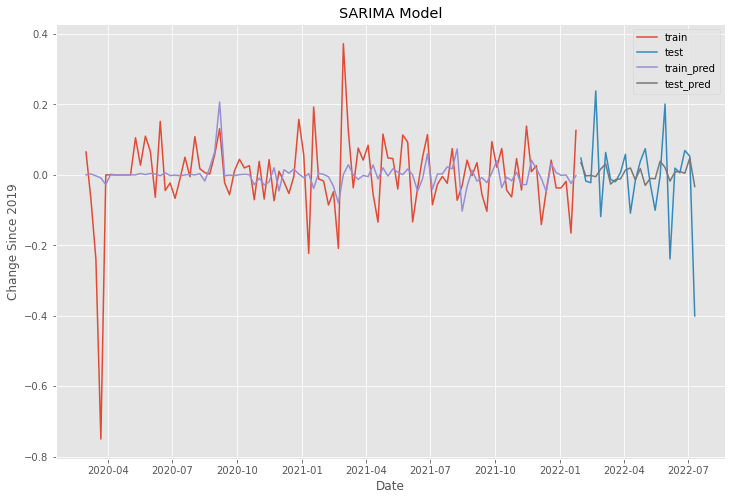

In [149]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(DAL_train, label='train')
ax.plot(DAL_test, label='test')
ax.plot(train_preds_3, label='train_pred')
ax.plot(test_preds_3, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('SARIMA Model')

plt.legend();

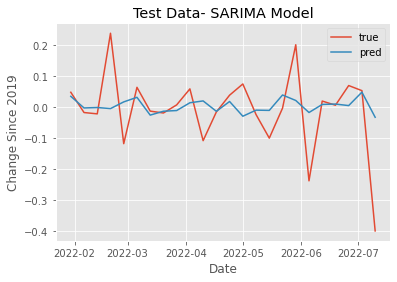

In [150]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(DAL_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend();

In [151]:
DAL_SARIMA_RMSE = np.sqrt(mean_squared_error(DAL_test, test_preds_3))
DAL_SARIMA_RMSE

0.11903538705165699

In [152]:
#compiled test scores

In [153]:
print(f'AR_1 AIC: {DAL_AR_1.aic}' )
print(f'AR_2 AIC: {DAL_AR_2.aic}' )
print(f'SMODEL AIC: {DAL_SARIMA.aic}' )

AR_1 AIC: -80.2717099263358
AR_2 AIC: -139.58725612741753
SMODEL AIC: -142.7383850124196


In [154]:
print(f'Naive RMSE: {DAL_naive_rmse}')
print(f'AR_1 RMSE: {DAL_AR_1_RMSE}' )
print(f'AR_2 RMSE: {DAL_AR_2_RMSE}' )
print(f'SMODEL RMSE: {DAL_SARIMA_RMSE}' )

Naive RMSE: 0.1597009588657071
AR_1 RMSE: 0.1839036738349726
AR_2 RMSE: 0.12517223304159336
SMODEL RMSE: 0.11903538705165699


Overall, none of these models performed very well, given their p-values. Regardless, the SARIMA model had the lowest AIC and RMSE, so I will choose it as my final model.

In [155]:
#final model- SARIMA

In [156]:
#Mean Absolute Error
DAL_MAE = mean_absolute_error(DAL_test,test_preds_3)*100
print(f'DAL MAE: {DAL_MAE:.2f}%')

DAL MAE: 7.48%


My test predictions are 7.48% off from the true values.

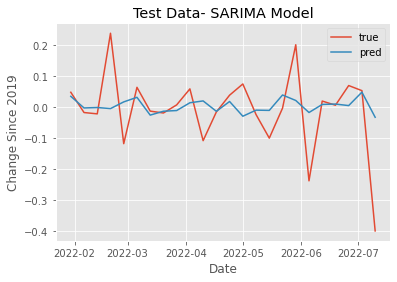

In [157]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(DAL_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend()
plt.savefig('Images/Test_Preds/DAL_final_model_test_preds',bbox_inches='tight');

### Forecasting Dallas

In [158]:
DAL_SARIMA =SARIMAX(DAL_test,
                  order=(1,0,1),
                  seasonal_order=(1,0,1,24),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
DAL_forecast = DAL_SARIMA.forecast(steps=12)
print(DAL_forecast)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2022-07-17    0.29
2022-07-24    0.00
2022-07-31   -0.01
2022-08-07    0.10
2022-08-14   -0.05
2022-08-21    0.03
2022-08-28   -0.01
2022-09-04   -0.01
2022-09-11    0.00
2022-09-18    0.02
2022-09-25   -0.04
2022-10-02   -0.01
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [159]:
#DAL Forecasting Mean
DAL_forecast_mean = DAL_forecast.mean()*100
print(f'DAL Forecasting Mean: {DAL_forecast_mean:.2f}%')

DAL Forecasting Mean: 2.65%


Dallas' forecast has slightly higher predictions on average than the previous cities, with a 2.65% increase in reservations since 2019.

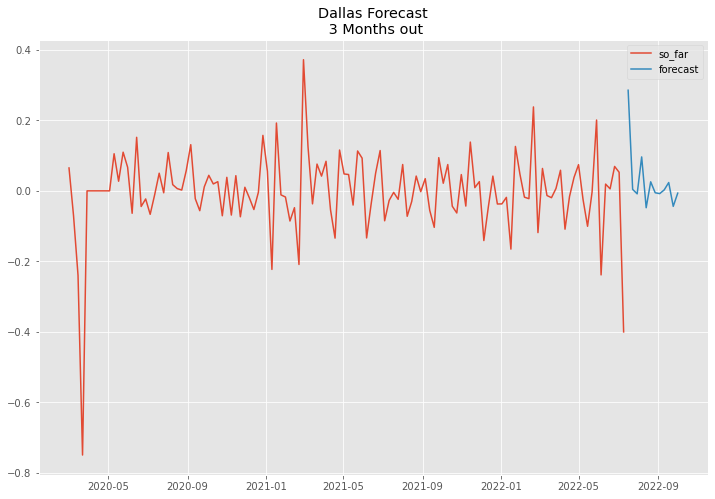

In [160]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(DAL_new, label='so_far')
ax.plot(DAL_forecast, label='forecast')
ax.set_title('Dallas Forecast\n 3 Months out')

plt.legend()
plt.savefig('Images/Forecasts/DAL_forecast',bbox_inches='tight');

## Miami Modeling

In [161]:
# Define train and test sets according to the index cutoff
# using the same index cutoff as NY because all cities have the same number of rows
MIA_train = MIA_new[:cutoff]
MIA_test = MIA_new[cutoff:]

In [162]:
#Baseline Model
MIA_naive = MIA_train.shift(1).dropna()
MIA_naive.head()

2020-03-08    0.03
2020-03-15   -0.06
2020-03-22   -0.16
2020-03-29   -0.78
2020-04-05    0.00
Freq: W-SUN, Name: Miami, dtype: float64

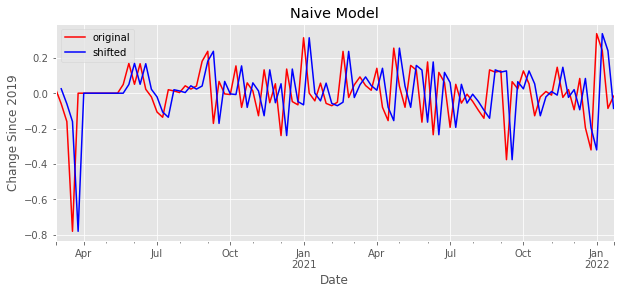

In [163]:
fig, ax = plt.subplots(figsize=(10, 4))

MIA_train[0:200].plot(ax=ax, c='r', label='original')
MIA_naive[0:200].plot(ax=ax, c='b', label='shifted')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Naive Model')
ax.legend();

In [164]:
MIA_naive_rmse = np.sqrt(mean_squared_error(MIA_train[1:], MIA_naive.dropna()))
MIA_naive_rmse

0.21572785324724914

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


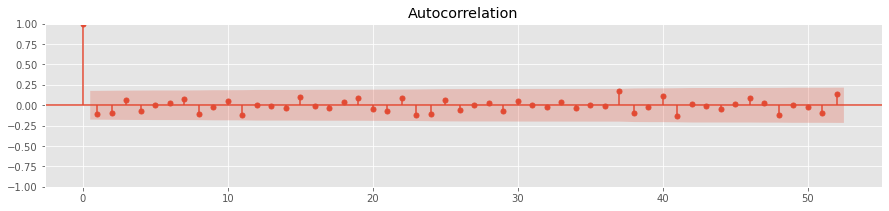

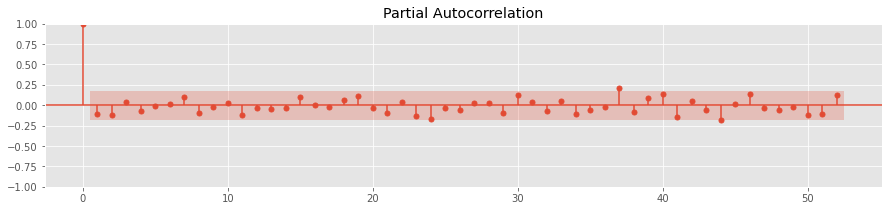

In [165]:
#look at autocorrelation and partial autocorrelation plots
fig, ax = plt.subplots(figsize=(15,3))
plot_acf(MIA_new, ax=ax, lags=52);

fig, ax = plt.subplots(figsize=(15,3))
plot_pacf(MIA_new, ax=ax, lags=52);

Again, the autocorrelation and partial autocorrelation plots show that the only values with statistical significance are 0, which means that an ARIMA model is not a great option for this data. I will try a standard ARIMA model with lags of 1 to see how it performs.  
Now that I have modeled several cities' data, I am assuming a SARIMA model will perform better than any ARIMA model, however, I will try an ARIMA model first as a comparison.

In [166]:
#First ARIMA model
MIA_AR_1 = ARIMA(MIA_train, order=(1, 0, 1)).fit()  
print(MIA_AR_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Miami   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  51.740
Date:                Tue, 12 Jul 2022   AIC                            -95.480
Time:                        12:37:40   BIC                            -85.060
Sample:                    03-01-2020   HQIC                           -91.263
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.004      1.992      0.046       0.000       0.017
ar.L1          0.8882      0.109      8.165      0.000       0.675       1.101
ma.L1         -0.9998      9.849     -0.102      0.9

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [167]:
train_preds_1 = MIA_AR_1.predict(typ='levels')
test_preds_1 = MIA_AR_1.predict(start=MIA_test.index[0], end=MIA_test.index[-1],typ='levels')

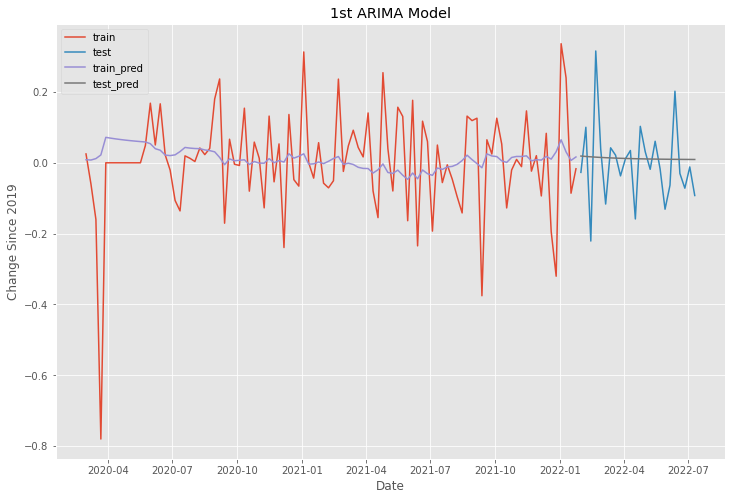

In [168]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(MIA_train, label='train')
ax.plot(MIA_test, label='test')
ax.plot(train_preds_1, label='train_pred')
ax.plot(test_preds_1, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('1st ARIMA Model')
plt.legend();

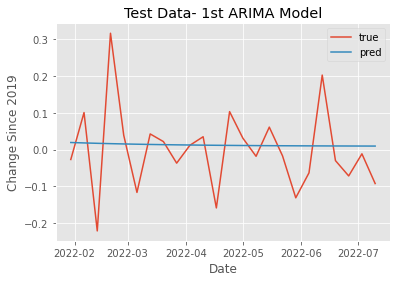

In [169]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(MIA_test, label='true')
ax.plot(test_preds_1, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 1st ARIMA Model')

plt.legend();

In [170]:
MIA_AR_1_RMSE = np.sqrt(mean_squared_error(MIA_test, test_preds_1))
MIA_AR_1_RMSE

0.11181608350666887

While this first ARIMA model performed significantly better than the baseline, its test predictions are still a straight line at 0. This again could mean that I don't have enough data to make an accurate time series model. I will now use the auto-model tool to see if I can improve the parameters.

In [171]:
#Use auto_model tool to find the optimal ARIMA model 

auto_model = pm.auto_arima(MIA_train, start_p=1, start_q=1,
                      test='adf',       
                      max_p=10, max_q=10,
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-95.456, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-98.174, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-96.683, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-96.791, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-96.201, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.118 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                  50.087
Date:                Tue, 12 Jul 2022   AIC                            -98.174
Time:                        12:37:41   BIC                            -95.569
Sample:                             0   HQIC                           -97.120
                                - 100                                         
Co

The autocorrelation tool did not provide any model that would help optimize the parameters, which again signifies that an ARIMA model is not a great option for this data. I will try another standard model to see how it compares to my first model.

In [172]:
#2nd ARIMA model
MIA_AR_2 = ARIMA(MIA_train, order=(0,0,1)).fit()  
print(MIA_AR_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Miami   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  50.412
Date:                Tue, 12 Jul 2022   AIC                            -94.824
Time:                        12:37:41   BIC                            -87.008
Sample:                    03-01-2020   HQIC                           -91.661
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.016      0.154      0.878      -0.028       0.033
ma.L1         -0.0861      0.099     -0.865      0.387      -0.281       0.109
sigma2         0.0214      0.002     12.352      0.0

In [173]:
train_preds_2 = MIA_AR_2.predict(typ='levels')
test_preds_2 = MIA_AR_2.predict(start=MIA_test.index[0], end=MIA_test.index[-1],typ='levels')

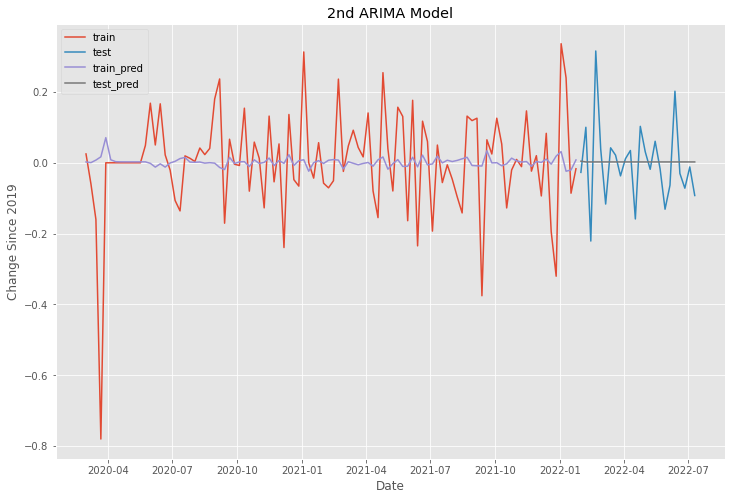

In [174]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(MIA_train, label='train')
ax.plot(MIA_test, label='test')
ax.plot(train_preds_2, label='train_pred')
ax.plot(test_preds_2, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('2nd ARIMA Model')

plt.legend();

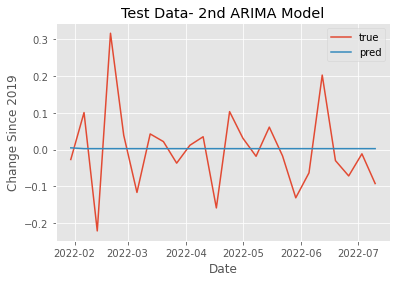

In [175]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(MIA_test, label='true')
ax.plot(test_preds_2, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 2nd ARIMA Model')

plt.legend();

In [176]:
MIA_AR_2_RMSE = np.sqrt(mean_squared_error(MIA_test, test_preds_2))
MIA_AR_2_RMSE

0.11134922737811134

These two ARIMA models gave virtually the same AIC and RMSE scores. I will now try a SARIMA model using the metrics from the second ARIMA model and a seasonality lag of 24, which according to the PACF, is a statistically significant lag. 

In [177]:
MIA_SARIMA =SARIMAX(MIA_train,
                  order=(0,0,1),
                  seasonal_order=(0,0,1,24),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
print(MIA_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Miami   No. Observations:                  100
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 24)   Log Likelihood                  51.613
Date:                            Tue, 12 Jul 2022   AIC                            -97.227
Time:                                    12:37:41   BIC                            -89.411
Sample:                                03-01-2020   HQIC                           -94.064
                                     - 01-23-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1197      0.096     -1.245      0.213      -0.308       0.069
ma.S.L24      -0.2474      0.160   

In [178]:
train_preds_3 = MIA_SARIMA.predict(typ='levels')
test_preds_3 = MIA_SARIMA.predict(start=MIA_test.index[0], end=MIA_test.index[-1],typ='levels')

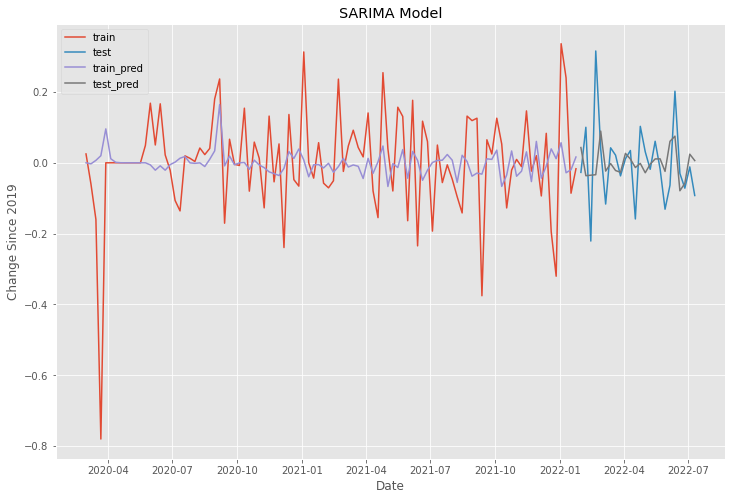

In [179]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(MIA_train, label='train')
ax.plot(MIA_test, label='test')
ax.plot(train_preds_3, label='train_pred')
ax.plot(test_preds_3, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('SARIMA Model')

plt.legend();

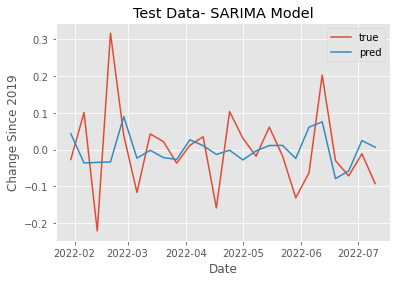

In [180]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(MIA_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend();

In [181]:
MIA_SARIMA_RMSE = np.sqrt(mean_squared_error(MIA_test, test_preds_3))
MIA_SARIMA_RMSE

0.11027254671691786

In [182]:
#compiled test scores

In [183]:
print(f'AR_1 AIC: {MIA_AR_1.aic}' )
print(f'AR_2 AIC: {MIA_AR_2.aic}' )
print(f'SMODEL AIC: {MIA_SARIMA.aic}' )

AR_1 AIC: -95.48042207480731
AR_2 AIC: -94.82378147100006
SMODEL AIC: -97.226760436329


In [184]:
print(f'Naive RMSE: {MIA_naive_rmse}')
print(f'AR_1 RMSE: {MIA_AR_1_RMSE}' )
print(f'AR_2 RMSE: {MIA_AR_2_RMSE}' )
print(f'SMODEL RMSE: {MIA_SARIMA_RMSE}' )

Naive RMSE: 0.21572785324724914
AR_1 RMSE: 0.11181608350666887
AR_2 RMSE: 0.11134922737811134
SMODEL RMSE: 0.11027254671691786


My SARIMA model has a slightly lower AIC and RMSE so I will choose this to be my final model.

In [185]:
#final model- SARIMA

In [186]:
#Mean Absolute Error
MIA_MAE = mean_absolute_error(MIA_test,test_preds_3)*100
print(f'MIA MAE: {MIA_MAE:.2f}%')

MIA MAE: 8.25%


My test predictions are 8.25% off from the true values.

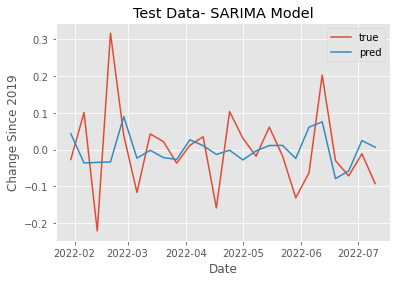

In [187]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(MIA_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend()
plt.savefig('Images/Test_Preds/MIA_final_model_test_preds',bbox_inches='tight');

### Forecasting Miami

In [188]:
MIA_SARIMA =SARIMAX(MIA_test,
                  order=(0,0,1),
                  seasonal_order=(0,0,1,24),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
MIA_forecast = MIA_SARIMA.forecast(steps=12)
print(MIA_forecast)

2022-07-17    0.07
2022-07-24    0.05
2022-07-31   -0.11
2022-08-07    0.16
2022-08-14    0.02
2022-08-21   -0.06
2022-08-28    0.02
2022-09-04    0.01
2022-09-11   -0.02
2022-09-18    0.01
2022-09-25    0.02
2022-10-02   -0.08
Freq: W-SUN, Name: predicted_mean, dtype: float64


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [189]:
#MIA Forecasting Mean
MIA_forecast_mean = MIA_forecast.mean()*100
print(f'MIA Forecasting Mean: {MIA_forecast_mean:.2f}%')

MIA Forecasting Mean: 0.68%


Again, Miami's forecast is, on average, very simlar to the 2019 baseline values.  

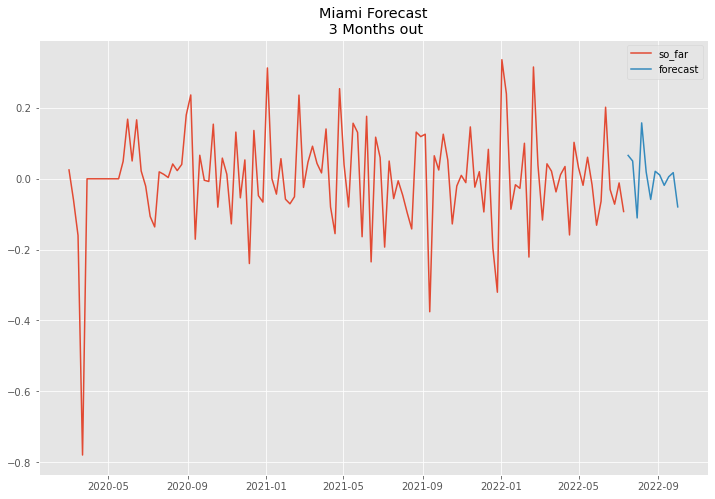

In [190]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(MIA_new, label='so_far')
ax.plot(MIA_forecast, label='forecast')
ax.set_title('Miami Forecast\n 3 Months out')

plt.legend()
plt.savefig('Images/Forecasts/MIA_forecast',bbox_inches='tight');

## Phoenix Modeling

In [191]:
# Define train and test sets according to the index cutoff
# using the same index cutoff as NY because all cities have the same number of rows
PHO_train = PHO_new[:cutoff]
PHO_test = PHO_new[cutoff:]

In [192]:
#Baseline Model
PHO_naive = PHO_train.shift(1).dropna()
PHO_naive.head()

2020-03-08   -0.02
2020-03-15   -0.06
2020-03-22   -0.19
2020-03-29   -0.73
2020-04-05   -0.00
Freq: W-SUN, Name: Phoenix, dtype: float64

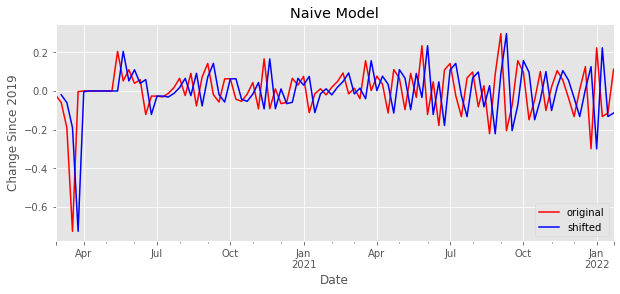

In [193]:
fig, ax = plt.subplots(figsize=(10, 4))

PHO_train[0:200].plot(ax=ax, c='r', label='original')
PHO_naive[0:200].plot(ax=ax, c='b', label='shifted')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Naive Model')
ax.legend();

In [194]:
PHO_naive_rmse = np.sqrt(mean_squared_error(PHO_train[1:], PHO_naive.dropna()))
PHO_naive_rmse

0.1857072130798882

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


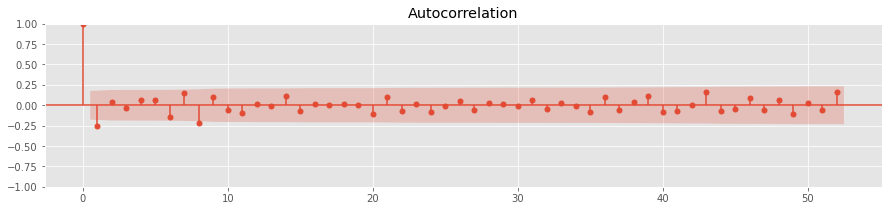

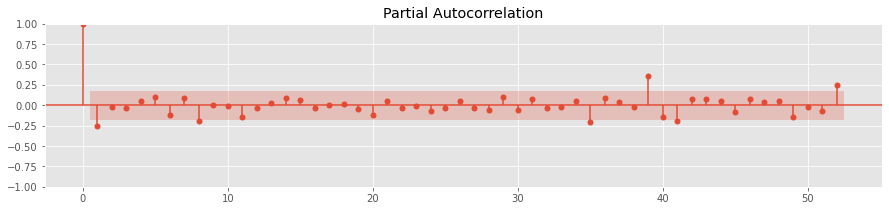

In [195]:
#look at autocorrelation and partial autocorrelation plots
fig, ax = plt.subplots(figsize=(15,3))
plot_acf(PHO_new, ax=ax, lags=52);

fig, ax = plt.subplots(figsize=(15,3))
plot_pacf(PHO_new, ax=ax, lags=52);

In [196]:
#First ARIMA model based on the autocorrelation and partial autocorrelation plots
PHO_AR_1 = ARIMA(PHO_train, order=(1, 0, 1)).fit()  
print(PHO_AR_1.summary())

                               SARIMAX Results                                
Dep. Variable:                Phoenix   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  66.755
Date:                Tue, 12 Jul 2022   AIC                           -125.511
Time:                        12:37:43   BIC                           -115.090
Sample:                    03-01-2020   HQIC                          -121.293
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.013     -0.082      0.934      -0.027       0.025
ar.L1          0.1556      1.286      0.121      0.904      -2.365       2.676
ma.L1         -0.2644      1.282     -0.206      0.8

In [197]:
train_preds_1 = PHO_AR_1.predict(typ='levels')
test_preds_1 = PHO_AR_1.predict(start=PHO_test.index[0], end=PHO_test.index[-1],typ='levels')

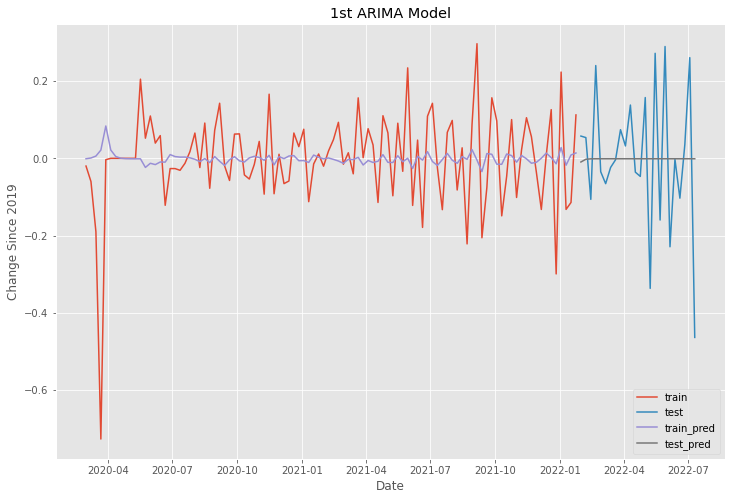

In [198]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(PHO_train, label='train')
ax.plot(PHO_test, label='test')
ax.plot(train_preds_1, label='train_pred')
ax.plot(test_preds_1, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('1st ARIMA Model')
plt.legend();

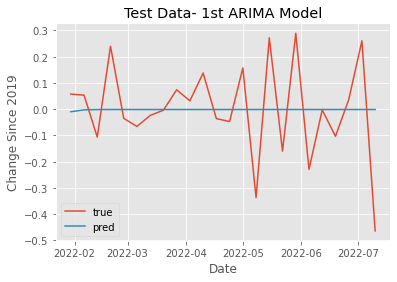

In [199]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(PHO_test, label='true')
ax.plot(test_preds_1, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 1st ARIMA Model')

plt.legend();

In [200]:
PHO_AR_1_RMSE = np.sqrt(mean_squared_error(PHO_test, test_preds_1))
PHO_AR_1_RMSE

0.1802387523152903

With an RMSE that is only marginally better than the baseline, and no significant P-values listed, this is not a very good model. I will use the auto-model to try to improve my scores.

In [201]:
#Use auto_model tool to find the optimal ARIMA model 

auto_model = pm.auto_arima(PHO_train, start_p=1, start_q=1,
                      test='adf',       
                      max_p=10, max_q=10,
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-127.501, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-130.297, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-129.278, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-129.412, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-128.305, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.140 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                  66.149
Date:                Tue, 12 Jul 2022   AIC                           -130.297
Time:                        12:37:43   BIC                           -127.692
Sample:                             0   HQIC                          -129.243
                                - 100                                       

Once again, the autocorrelation tool did not provide any model that would help optimize the parameters, which again signifies that an ARIMA model is not a great option for this data. I will try another standard model to see how it compares to my first model.

In [202]:
#2nd ARIMA model 
PHO_AR_2 = ARIMA(PHO_train, order=(0,0,1)).fit()  
print(PHO_AR_2.summary())

                               SARIMAX Results                                
Dep. Variable:                Phoenix   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  66.712
Date:                Tue, 12 Jul 2022   AIC                           -127.423
Time:                        12:37:43   BIC                           -119.608
Sample:                    03-01-2020   HQIC                          -124.260
                         - 01-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.013     -0.087      0.931      -0.027       0.025
ma.L1         -0.1113      0.110     -1.010      0.312      -0.327       0.105
sigma2         0.0154      0.001     11.832      0.0

In [203]:
train_preds_2 = PHO_AR_2.predict(typ='levels')
test_preds_2 = PHO_AR_2.predict(start=PHO_test.index[0], end=PHO_test.index[-1],typ='levels')

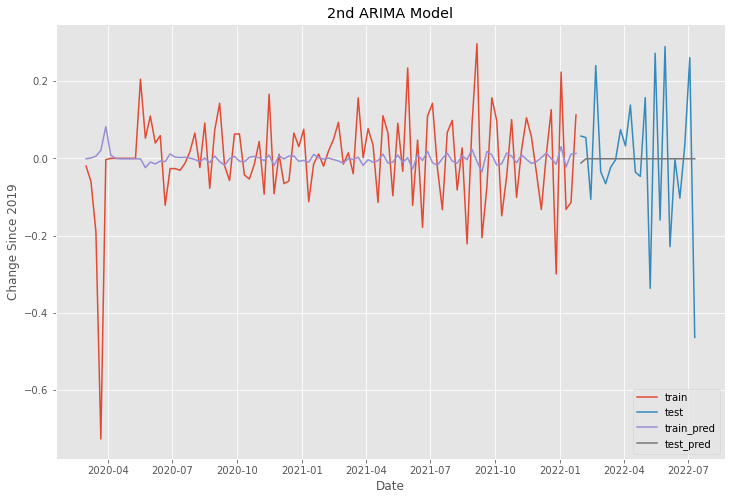

In [204]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(PHO_train, label='train')
ax.plot(PHO_test, label='test')
ax.plot(train_preds_2, label='train_pred')
ax.plot(test_preds_2, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('2nd ARIMA Model')

plt.legend();

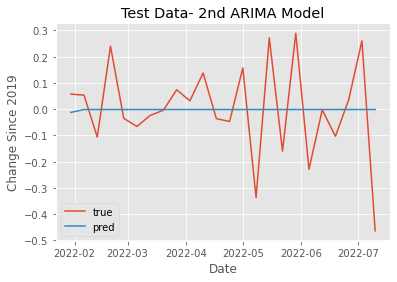

In [205]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(PHO_test, label='true')
ax.plot(test_preds_2, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- 2nd ARIMA Model')

plt.legend();

In [206]:
PHO_AR_2_RMSE = np.sqrt(mean_squared_error(PHO_test, test_preds_2))
PHO_AR_2_RMSE

0.18026808942322742

This second ARIMA model produced a very similar AIC and RMSE to the first ARIMA model. I will now try the same model with a seasonality component with a lag of 8, according to the PACF.

In [207]:
PHO_SARIMA =SARIMAX(PHO_train,
                  order=(0,0,1),
                  seasonal_order=(0,0,1,8),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
print(PHO_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           Phoenix   No. Observations:                  100
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 8)   Log Likelihood                  67.780
Date:                           Tue, 12 Jul 2022   AIC                           -129.560
Time:                                   12:37:44   BIC                           -121.745
Sample:                               03-01-2020   HQIC                          -126.397
                                    - 01-23-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1205      0.105     -1.143      0.253      -0.327       0.086
ma.S.L8       -0.1976      0.153     -1.288

In [208]:
train_preds_3 = PHO_SARIMA.predict(typ='levels')
test_preds_3 = PHO_SARIMA.predict(start=PHO_test.index[0], end=PHO_test.index[-1],typ='levels')

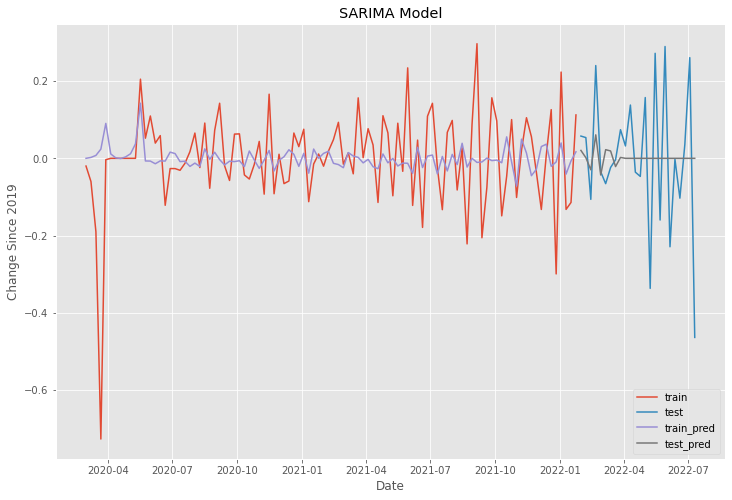

In [209]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(PHO_train, label='train')
ax.plot(PHO_test, label='test')
ax.plot(train_preds_3, label='train_pred')
ax.plot(test_preds_3, label='test_pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('SARIMA Model')

plt.legend();

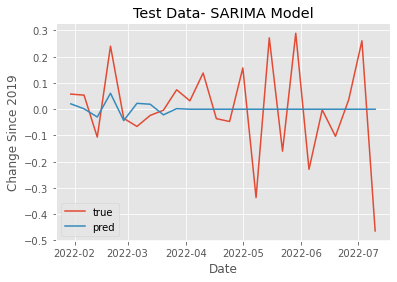

In [210]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(PHO_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend();

In [211]:
PHO_SARIMA_RMSE = np.sqrt(mean_squared_error(PHO_test, test_preds_3))
PHO_SARIMA_RMSE

0.17665483062164647

The SARIMA model produced marginally better results than either ARIMA model. 

In [212]:
#compiled test scores

In [213]:
print(f'AR_1 AIC: {PHO_AR_1.aic}' )
print(f'AR_2 AIC: {PHO_AR_2.aic}' )
print(f'SMODEL AIC: {PHO_SARIMA.aic}' )

AR_1 AIC: -125.51082693044506
AR_2 AIC: -127.42332421866612
SMODEL AIC: -129.56011422125778


In [214]:
print(f'Naive RMSE: {PHO_naive_rmse}')
print(f'AR_1 RMSE: {PHO_AR_1_RMSE}' )
print(f'AR_2 RMSE: {PHO_AR_2_RMSE}' )
print(f'SMODEL RMSE: {PHO_SARIMA_RMSE}' )

Naive RMSE: 0.1857072130798882
AR_1 RMSE: 0.1802387523152903
AR_2 RMSE: 0.18026808942322742
SMODEL RMSE: 0.17665483062164647


Since the SARIMA model produced the lowest AIC and RMSE, I will choose it to be my final model.

In [215]:
#final model- SARIMA

In [216]:
#Mean Absolute Error
PHO_MAE = mean_absolute_error(PHO_test,test_preds_3)*100
print(f'PHO MAE: {PHO_MAE:.2f}%')

PHO MAE: 13.06%


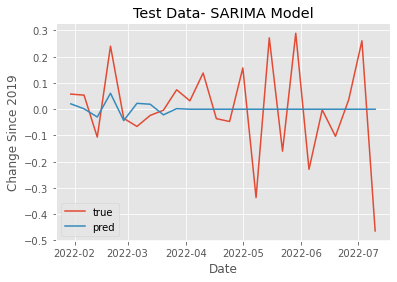

In [217]:
# Zoomed in on test data
fig, ax = plt.subplots()

ax.plot(PHO_test, label='true')
ax.plot(test_preds_3, label='pred')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('Test Data- SARIMA Model')

plt.legend()
plt.savefig('Images/Test_Preds/PHO_final_model_test_preds',bbox_inches='tight');

### Forecasting Phoenix

In [218]:
PHO_SARIMA =SARIMAX(PHO_test,
                  order=(0,0,1),
                  seasonal_order=(0,0,1,8),
                  enforce_stationarity=True,
                  enforce_invertibility=True).fit()
PHO_forecast = PHO_SARIMA.forecast(steps=12)
print(PHO_forecast)

2022-07-17    0.23
2022-07-24   -0.11
2022-07-31    0.07
2022-08-07   -0.00
2022-08-14    0.04
2022-08-21   -0.03
2022-08-28   -0.05
2022-09-04    0.13
2022-09-11   -0.07
2022-09-18    0.00
2022-09-25    0.00
2022-10-02    0.00
Freq: W-SUN, Name: predicted_mean, dtype: float64


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [219]:
#PHO Forecasting Mean
PHO_forecast_mean = PHO_forecast.mean()*100
print(f'PHO Forecasting Mean: {PHO_forecast_mean:.2f}%')

PHO Forecasting Mean: 1.83%


Phoenix's forecasts are almost 2% higher than the baseline

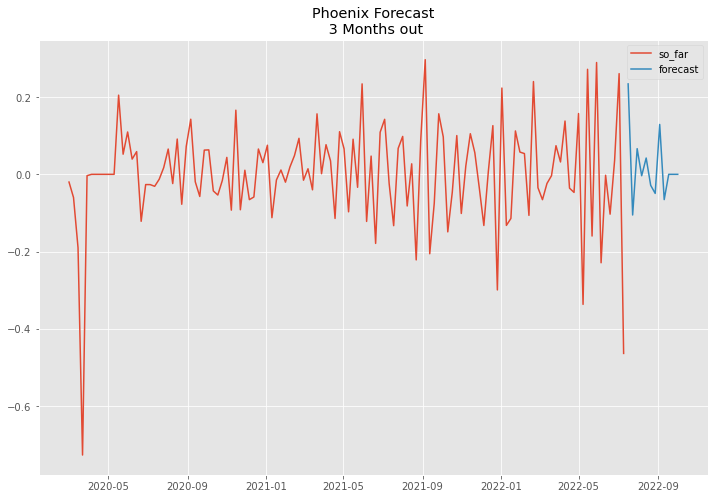

In [220]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(PHO_new, label='so_far')
ax.plot(PHO_forecast, label='forecast')
ax.set_title('Phoenix Forecast\n 3 Months out')

plt.legend()
plt.savefig('Images/Forecasts/PHO_forecast',bbox_inches='tight');

# Conclusion/Recommendations 

In [221]:
#Compiled MAE scores
print(f'NY MAE: {NY_MAE:.2f}%')
print(f'LA MAE: {LA_MAE:.2f}%')
print(f'NOLA MAE: {NOLA_MAE:.2f}%')
print(f'DAL MAE: {DAL_MAE:.2f}%')
print(f'MIA MAE: {MIA_MAE:.2f}%')
print(f'PHO MAE: {PHO_MAE:.2f}%')

NY MAE: 5.65%
LA MAE: 8.27%
NOLA MAE: 6.66%
DAL MAE: 7.48%
MIA MAE: 8.25%
PHO MAE: 13.06%


It became clear throughout my process of creating the models that an ARIMA/ SARIMA model would not be the best option, given my lack of data. However, with optimized parameters (using the ACF and PCF graphs and the auto-modeling tool) and considering seasonality, my test data for the final models had a mean absolute error of 5.65%-13.06%. Given that the actual data was about 20%-50% above or below the baseline of 2019's data, a model with an average error of 5.65%-13.06% can help predict weekly reservations for the coming months and how their city's reservations will change since 2019.  

In [222]:
#Compiled Forecasting Mean Scores
print(f'NY Forecasting Mean: {NY_forecast_mean:.2f}%')
print(f'LA Forecasting Mean: {LA_forecast_mean:.2f}%')
print(f'NOLA Forecasting Mean: {NOLA_forecast_mean:.2f}%')
print(f'DAL Forecasting Mean: {DAL_forecast_mean:.2f}%')
print(f'MIA Forecasting Mean: {MIA_forecast_mean:.2f}%')
print(f'PHO Forecasting Mean: {PHO_forecast_mean:.2f}%')  

NY Forecasting Mean: 1.14%
LA Forecasting Mean: 0.83%
NOLA Forecasting Mean: 0.18%
DAL Forecasting Mean: 2.65%
MIA Forecasting Mean: 0.68%
PHO Forecasting Mean: 1.83%


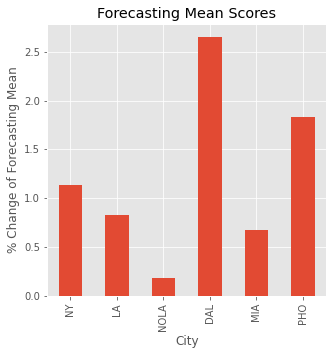

In [223]:
plotdata = pd.DataFrame(
    {"Forecasting_means": [1.14, 0.83, 0.18, 2.65, 0.68, 1.83]}, 
    index=["NY", "LA", "NOLA", "DAL", "MIA", "PHO"])
plotdata.plot(kind="bar", figsize=(5, 5), title= "Forecasting Mean Scores", legend = False)
plt.xlabel("City")
plt.ylabel("% Change of Forecasting Mean")
plt.savefig('Images/Forecasting_mean_scores',bbox_inches='tight');

Except for Miami, the Republican cities have higher forecasting means than the Democratic cities, meaning these cities have bounced back more since Covid, however, the predictions for all 6 cities are above the baseline. 

However, according to the actual values from 2020-2022, all 6 cities had fewer reservations on average than in 2019. As we saw in the "Average % Change since 2019" graph (in the EDA), all 6 cities had an average decrease in reservations between 7%-65%, with the 3 Democratic cities having a larger % loss. It is important to note that the average % change is for the entire 2.5-year period, and the last 20% of the data shows fluctuations up to 20% higher than in 2019. 

Because the National Restaurant Association does not have the authority to impact Covid restrictions imposed on restaurants, they can instead use these findings to determine how to help restaurants in different cities overcome the restrictions. As these findings show, Democratic cities will need more help recovering from Covid because of the restrictions they endured. These resources could be in the form of financial assistance, marketing resources, consumer trends, and resources to help track inventory and cost of goods to optimize their profit.

# Future Steps

- Because this forecast includes the shutdown in early 2020, another model could be done that starts after the shutdown to see if that produces more accurate predictions.
- Use point intervention for the big dips
- Use Python's “holidays” package to create an exogenous variable within the SARIMA models
- To avoid some of the limitations discussed above, collecting and analyzing the data at a more granule level would be helpful, such as comparing the same restaurants from 2019 through 2022 or the same types of cuisine.
- Take into account the weather in each city. This analysis included 5 warm-weather cities and one colder city (NY), however, NYC did have heated outdoor dining. If we compared only cities with similar weather, we might be able to create a more accurate comparison because of the availability of outdoor dining.
- Lastly, more data would be necessary to create an accurate model. Short of waiting for more data, if I had the data from before 2019, that could also help to predict the future. Another way to have more usable data would be to combine the reservation data for all the Democratic cities analyzed and all the Republican cities analyzed to compare the two groups as a whole.
- This data can also be graphed on Tableau to have a user interface that the National Restaurant Association or restaurants in these cities can use to see the forecasting. 

# Appendix

### Health vs. Economy Scores Per State

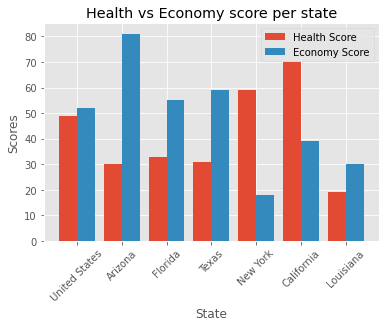

In [224]:
X = ['United States','Arizona','Florida','Texas', 'New York', 'California', "Louisiana"]
health_score = [49,30,33,31,59,70,19]
economy_score = [52,81,55,59,18,39,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, health_score, 0.4, label = 'Health Score')
plt.bar(X_axis + 0.2, economy_score, 0.4, label = 'Economy Score')
  
plt.xticks(X_axis, X)
plt.xlabel("State")
plt.ylabel('Scores')
plt.title("Health vs Economy score per state")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Images/Health_vs_Economy_Scores',bbox_inches='tight');

In [225]:
### Percent of Restaurants reopened

### LA Train/Test Split

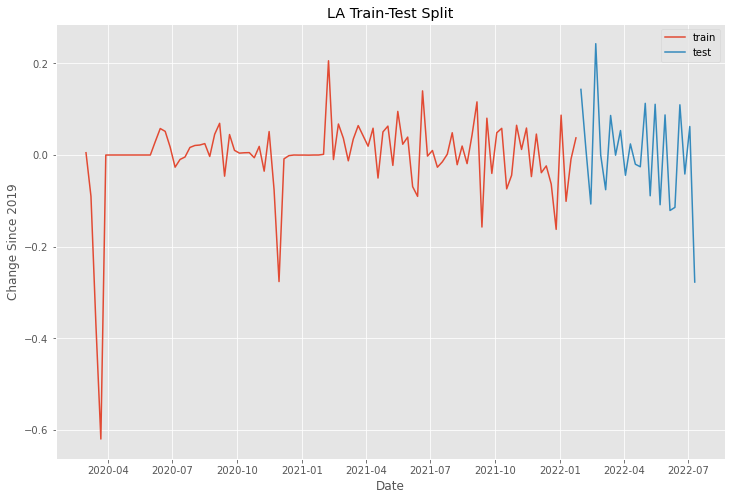

In [226]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(LA_train, label='train')
ax.plot(LA_test, label='test')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('LA Train-Test Split')
plt.legend();

### NOLA Train/Test Split

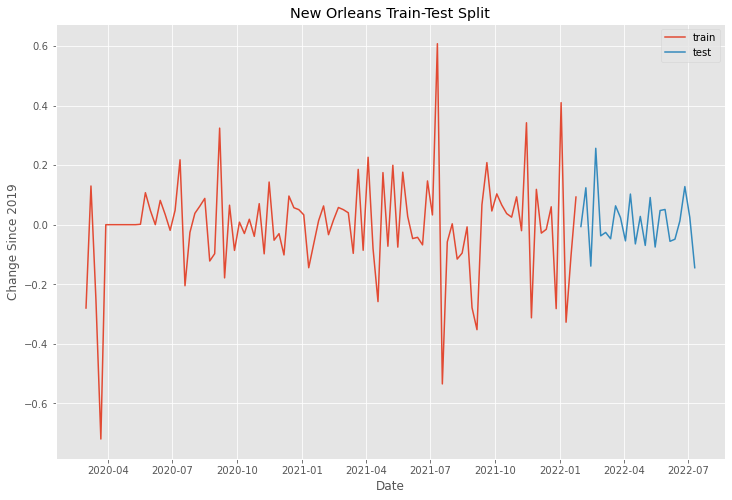

In [227]:
#visualize the train/test split

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(NOLA_train, label='train')
ax.plot(NOLA_test, label='test')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('New Orleans Train-Test Split')
plt.legend();

### DAL Train/Test Split

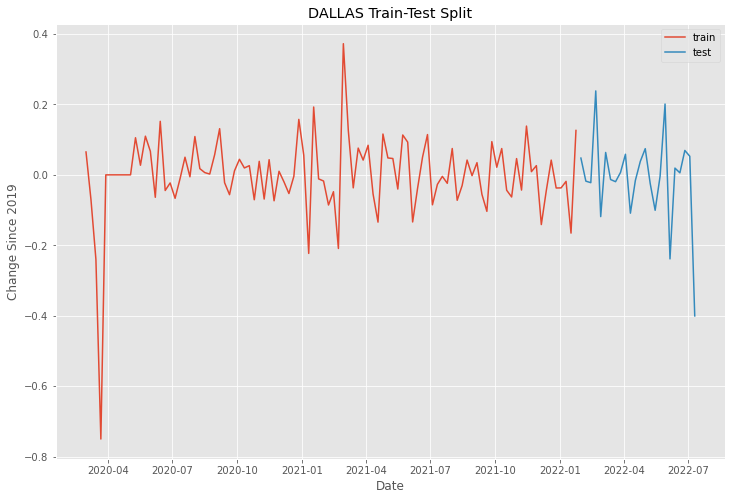

In [228]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(DAL_train, label='train')
ax.plot(DAL_test, label='test')

plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('DALLAS Train-Test Split')
plt.legend();

### MIA Train/Test Split

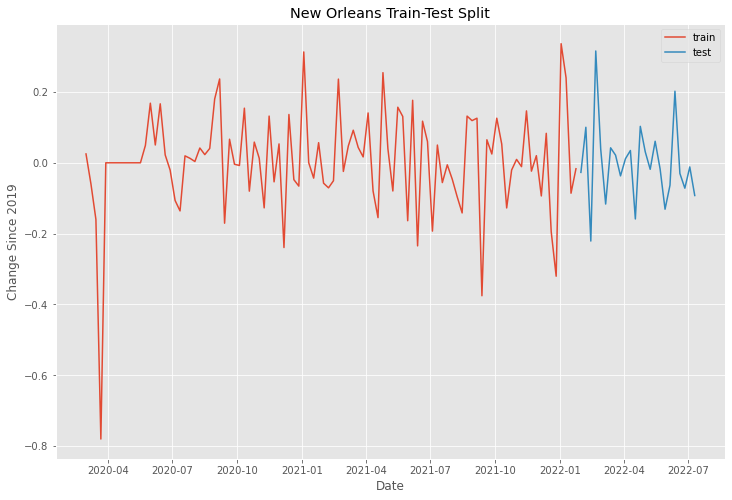

In [229]:
#visualize the train/test split

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(MIA_train, label='train')
ax.plot(MIA_test, label='test')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('New Orleans Train-Test Split')
plt.legend();

### PHO Train/Test Split

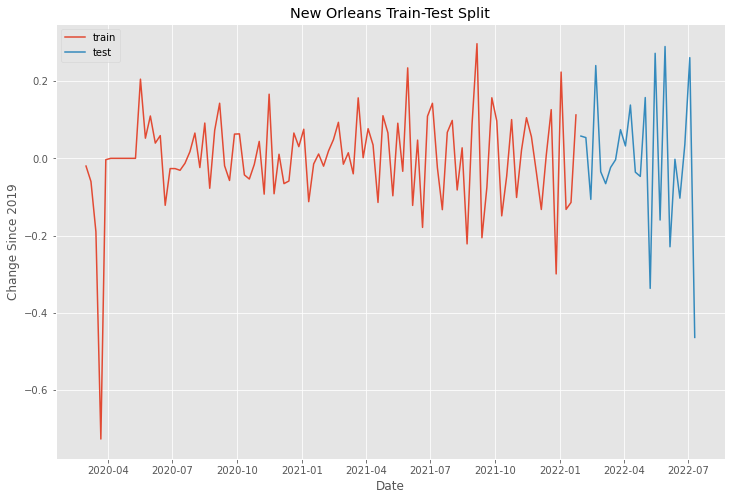

In [230]:
#visualize the train/test split

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(PHO_train, label='train')
ax.plot(PHO_test, label='test')
plt.xlabel('Date')
plt.ylabel('Change Since 2019')
ax.set_title('New Orleans Train-Test Split')
plt.legend();